# Q1 !

In [2]:
import pandas as pd 
import numpy as np 
import re 
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime
import plotly.express as px
import ast


#95a3c3

#e99675
#72b6a1

In [3]:
folder = "generated/"

df_movies=pd.read_csv(folder + "USE_THIS_DATASET.csv", index_col = 'Wikipedia movie ID')
df_movies['decade'] = (df_movies['Movie release year'] // 10) * 10

def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Apply the function to create a 'season' column
df_movies['season'] = df_movies['Movie release month'].apply(month_to_season)


df_movies.sample(1)

Movie name  Movie release month  Movie release year  \
Wikipedia movie ID                                                             
4825376             Boy and Bicycle                  9.0              1997.0   

                   Movie release date  Movie box office revenue  \
Wikipedia movie ID                                                
4825376                    1997-09-07                       NaN   

                    Movie runtime Movie languages     Movie countries  \
Wikipedia movie ID                                                      
4825376                      27.0     ['English']  ['United Kingdom']   

                      Movie genres Summary Sentiment  Compound Score Theme  \
Wikipedia movie ID                                                           
4825376             ['Short Film']     NaN       NaN             NaN   NaN   

                    vote_average  budget  decade season  
Wikipedia movie ID                                       
4825376                      NaN     NaN  1990.0   Fall

In [4]:
df_movies['Movie release date'] = pd.to_datetime(df_movies['Movie release date'], errors='coerce')
df_movies['Movie release day'] = df_movies['Movie release date'].dt.day

In [5]:
df_movies.sample(10)

Movie name  Movie release month  \
Wikipedia movie ID                                                           
36355595                         A Day for Lionhearts                  9.0   
30885438                                 Penitentiary                 12.0   
22522260                                  The Miracle                 12.0   
26137716            After Five in the Forest Primeval                  4.0   
21109961                            The Four Feathers                  5.0   
23092410                                       Vallal                  4.0   
20700852                                 Grey Gardens                  4.0   
32910206                                  Manganinnie                  NaN   
2017072                 Evangelion: Death and Rebirth                  3.0   
26469128                Veendum Chila Veettukaryangal                  9.0   

                    Movie release year Movie release date  \
Wikipedia movie ID                                          
36355595                        1961.0         1961-09-06   
30885438                        1979.0         1979-12-01   
22522260                        1913.0         1913-12-01   
26137716                        1996.0         1996-04-25   
21109961                        1921.0         1921-05-01   
23092410                        1997.0         1997-04-18   
20700852                        2009.0         2009-04-18   
32910206                           NaN                NaT   
2017072                         1997.0         1997-03-15   
26469128                        1999.0         1999-09-06   

                    Movie box office revenue  Movie runtime  \
Wikipedia movie ID                                            
36355595                                 NaN           96.0   
30885438                                 NaN           93.0   
22522260                                 NaN          100.0   
26137716                                 NaN           99.0   
21109961                                 NaN            NaN   
23092410                                 NaN          147.0   
20700852                                 NaN          103.0   
32910206                                 NaN           90.0   
2017072                                  NaN          115.0   
26469128                                 NaN          150.0   

                               Movie languages               Movie countries  \
Wikipedia movie ID                                                             
36355595                           ['Italian']                     ['Italy']   
30885438                           ['English']                          ['']   
22522260            ['Swedish', 'Silent film']                    ['Sweden']   
26137716                            ['German']                   ['Germany']   
21109961                           ['English']            ['United Kingdom']   
23092410                             ['Tamil']                     ['India']   
20700852                           ['English']  ['United States of America']   
32910206            ['Palawa kani', 'English']                 ['Australia']   
2017072                           ['Japanese']                     ['Japan']   
26469128                         ['Malayalam']                     ['India']   

                                                         Movie genres  \
Wikipedia movie ID                                                      
36355595                                        ['Drama', 'War film']   
30885438            ['Crime Fiction', 'Prison film', 'Action/Adven...   
22522260                  ['Silent film', 'Drama', 'Black-and-white']   
26137716                                          ['Romantic comedy']   
21109961            ['Romance Film', 'Drama', 'Adventure', 'War fi...   
23092410                    ['Family Film', 'Tamil cinema', 'Comedy']   
20700852            ['Period piece', 'Drama', 'Biographical film',...  

In [6]:
df_movies.isna().sum()

Movie name                      0
Movie release month         21171
Movie release year           6834
Movie release date          21171
Movie box office revenue    70535
Movie runtime               20379
Movie languages                 0
Movie countries                 0
Movie genres                    0
Summary                     19378
Sentiment                   19378
Compound Score              19378
Theme                       19605
vote_average                39682
budget                      73232
decade                       6834
season                      21171
Movie release day           21171
dtype: int64

## What Drives Movie Success: Genres, Themes, or Release Timing?

To guide her analysis effectively, Annabel considers which factors contribute most to a movie’s success. Taking the perspective of a producer focused solely on maximizing revenue, she chooses to evaluate success based on profitability, measured as the ratio of box office revenue to production budget. This approach reflects financial success regardless of audience appreciation, which isn’t always a reliable indicator in today’s market (as seen with recent Star Wars episodes). 

Note: We assume that the dataset is representative of the movie industry in terms of genre distribution, meaning no specific genre is disproportionately underrepresented in any given year. However, the overall number of movies in the dataset may not be evenly distributed across time, as older movies (e.g., from 100 years ago) are less likely to be included compared to more recent releases, which does not mean there were lesser movies in the past.

After merging data from multiple sources, Annabel is left with movie records spanning over 100 years. She wonders whether including such old data is meaningful and won't harm her analysis, given how much society has evolved over time. Factors like movie runtimes, peak release months, popular genres, and dominant themes may have changed significantly. For example, early films often had shorter runtimes due to technological limitations, while genres like superhero movies only gained popularity in recent decades. 

In an attempt to find out, her first step was to see how different elements evolved through time, and what is currently the most popular and done in the industry.


## Data Selection

In [9]:
#Filter df to only keep USA movies and non-nan rows
df_filtered = df_movies.dropna(subset=['budget', 'Movie box office revenue','Movie release year','Movie runtime'])
df_filtered = df_filtered[df_filtered['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_filtered = df_filtered[df_filtered['budget'] > 10000]

df_filtered['profitability'] = df_filtered['Movie box office revenue']/df_filtered['budget']

#Remove outliers for better visualization
df_filtered = df_filtered[df_filtered['profitability'] < 15]



In [10]:
#Number of movies remaining for our study : 
df_filtered.shape

(4683, 19)

In [11]:
#Get top 10 genres and themes
top_10_themes = df_filtered['Theme'].value_counts().sort_values(ascending=False).head(10)
print(top_10_themes)
df_filtered['Movie genres'] = df_filtered['Movie genres'].apply(ast.literal_eval)
df_exploded = df_filtered.explode('Movie genres')
top_10_genres = df_exploded['Movie genres'].value_counts().sort_values(ascending=False).head(10)
print(top_10_genres)

Theme
Redemption    635
Betrayal      289
Love          270
Survival      242
Revenge       235
Friendship    164
Identity      148
Deception     125
Resilience     89
Adventure      84
Name: count, dtype: int64
Movie genres
Drama               2358
Comedy              1855
Thriller            1451
Action              1231
Romance Film        1084
Action/Adventure     957
Crime Fiction        870
Adventure            787
Family Film          550
Indie                531
Name: count, dtype: int64


## Does the analysis matter?

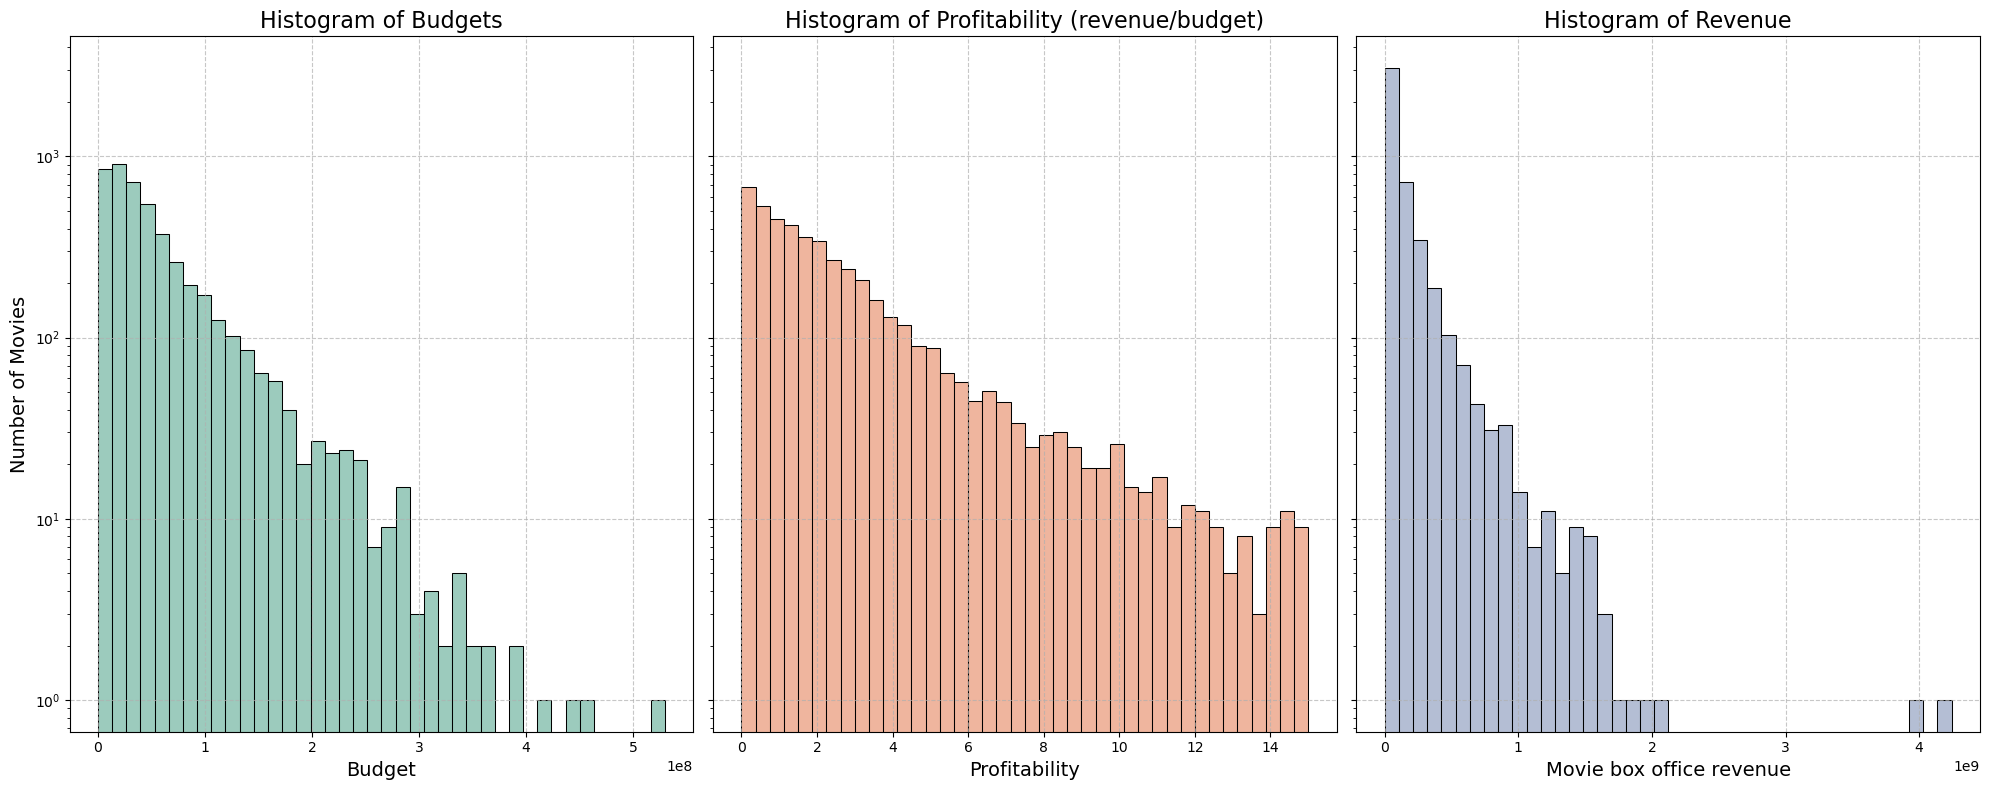

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

# Define the variables for each plot
variables = ['budget', 'profitability', 'Movie box office revenue']
titles = ["Histogram of Budgets", "Histogram of Profitability (revenue/budget)", "Histogram of Revenue"]
colors = ['#72b6a1', '#e99675', '#95a3c3']

# Loop through variables and create subplots
for ax, var, title, color in zip(axes, variables, titles, colors):
    # Plot histogram
    sns.histplot(data=df_filtered, x=var, bins=40, kde=False, color=color, alpha=0.7, ax=ax)
    
    # Use log scale for y-axis
    
    # Add reference line (mean)
    mean_value = df_filtered[var].mean()
    #ax.axvline(x=mean_value, color="#e99675", linestyle="--", linewidth=2, label=f'Mean: {mean_value:,.0f}')
    ax.set_yscale('log')

    # Customize the appearance
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(var.capitalize(), fontsize=14)
    ax.set_ylabel('Number of Movies', fontsize=14)
    
    ax.grid(True, linestyle='--', alpha=0.7)
    #ax.legend()

# Set global y-axis label
#fig.text(0.04, 0.5, "Frequency (Number of Movies)", va='center', rotation='vertical', fontsize=14)

# Final layout adjustments
plt.tight_layout()
plt.show()

In [14]:
# A wide range of budgets, movie box revenue combined together to give profitability. Reassured she won't get fired for bringing an useless analysis, she continues exploring the data. 

## How did movie profitability change with time?

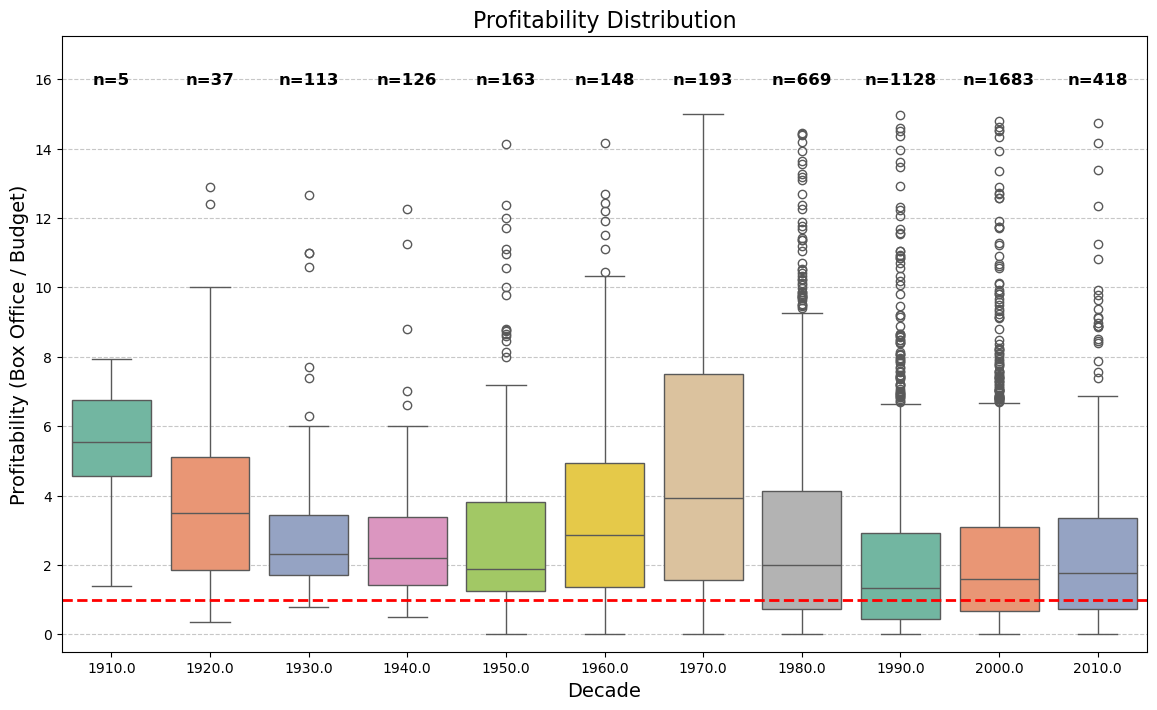

In [16]:
counts = df_filtered['decade'].value_counts().sort_index()

# Step 2: Create the boxplot
plt.figure(figsize=(14, 8))

sns.boxplot(
    x="decade",
    y="profitability",
    data=df_filtered,
    legend = False,
    hue = "decade",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()  # Get current axes
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(
        i, 
        y_max + 0.05 * y_range,  
        f'n={count}', 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)

plt.show()

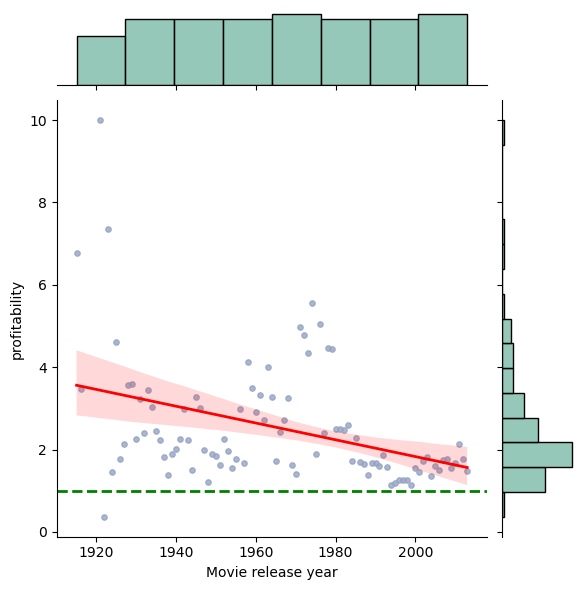

In [17]:
#scatter reg hex kde hist
df_prof = df_filtered[df_filtered['decade'] > 1000]

df_prof_grouped = df_prof.groupby('Movie release year')['profitability'].median().reset_index()

plot = sns.jointplot(x=df_prof_grouped['Movie release year'], y=df_prof_grouped['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

plot.ax_joint.axhline(1, color='green', linestyle='--', linewidth=2)

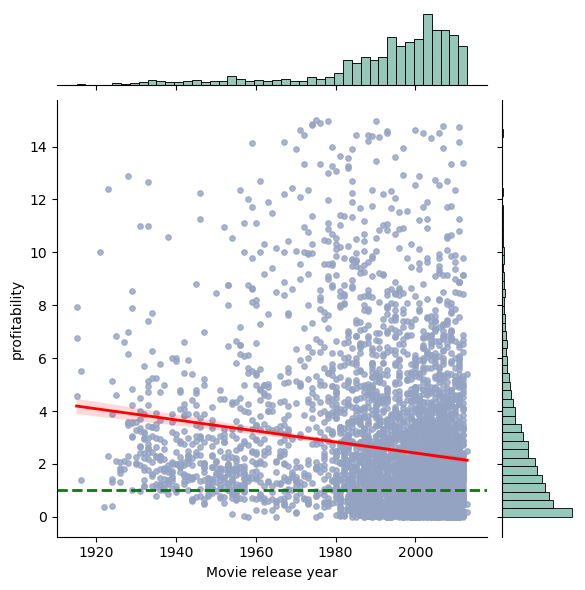

In [18]:
#scatter reg hex kde hist
df_prof = df_filtered[df_filtered['decade'] > 1000]



plot = sns.jointplot(x=df_prof['Movie release year'], y=df_prof['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

plot.ax_joint.axhline(1, color='green', linestyle='--', linewidth=2)


In [19]:
#Profitability decreases through the years, as other media might get some marketshare and attention from people. 
# She notices something odd, there seems to be a higher density of points under the green profitability treshhold the more we advance to recent movies. 

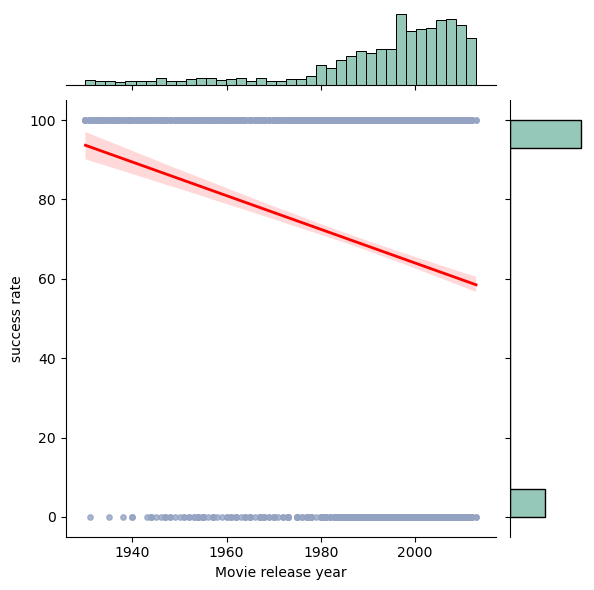

In [20]:
df_filtered['success rate'] = np.where(df_filtered['profitability'] > 1, 100, 0)
df_prof = df_filtered[df_filtered['decade'] > 1920] 



plot = sns.jointplot(x=df_prof['Movie release year'], y=df_prof['success rate'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

In [21]:
# Suspiscions confirmed, only about 60 to 70% of movies releasing recently turn a profit, while in the past more did. However Annabel ask herself.. recent big budget blockbusters
# may drop the success rate, having their budget significantly higher than others? Annabel want to test a first hypothesis : higher budget movies are a higher risk and are less likely to be profitable. 

## Hypothesis 1 : higher budget movies are a higher risk and are less likely to be profitable. 

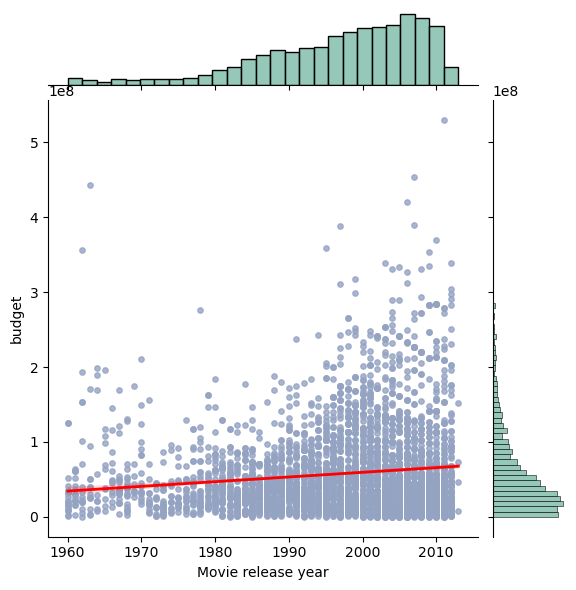

In [23]:
df_prof = df_filtered[df_filtered['decade'] > 1955]


plot = sns.jointplot(x=df_prof['Movie release year'], y=df_prof['budget'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

# Just to confirm her sentiment, movie budgets indeed increased with the years.

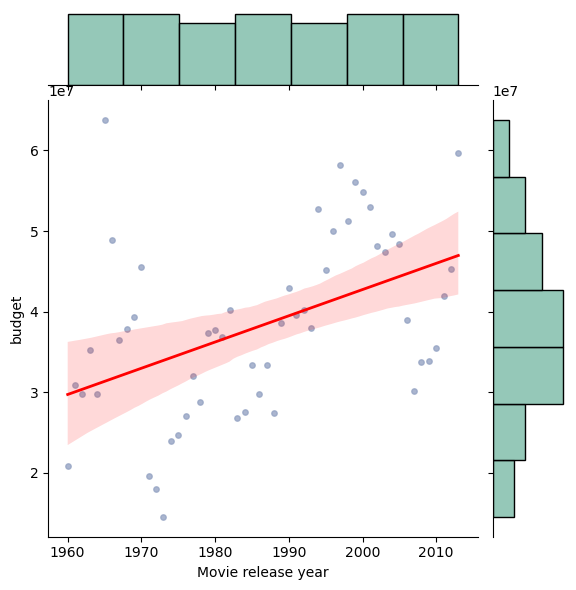

In [24]:
df_prof = df_filtered[df_filtered['decade'] > 1955]

df_prof_grouped = df_prof.groupby('Movie release year')['budget'].median().reset_index()

plot = sns.jointplot(x=df_prof_grouped['Movie release year'], y=df_prof_grouped['budget'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

# Just to confirm her sentiment, movie budgets indeed increased with the years.

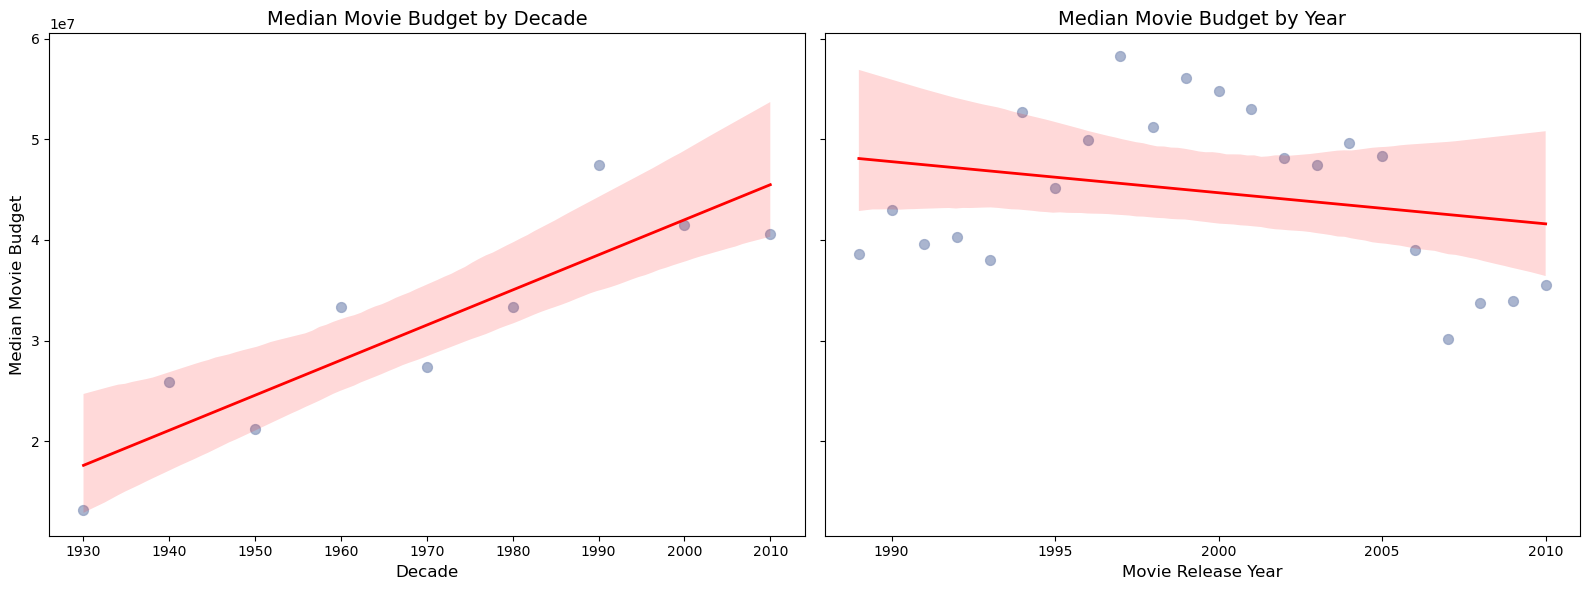

In [90]:
df_budget_decade = df_filtered.dropna(subset=['budget', 'decade'])
df_budget_decade = df_budget_decade[df_budget_decade['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_budget_decade = df_budget_decade[df_budget_decade['budget'] < 300000000]
df_budget_decade = df_budget_decade[df_budget_decade['decade'] > 1920]

# Group by decade and calculate the median runtime
median_budget_per_decade = df_budget_decade.groupby('decade')['budget'].median().reset_index()

# Second dataset: Median runtime by release year
df_budget_year = df_filtered.dropna(subset=['budget', 'Movie release year'])
df_budget_year = df_budget_year[df_budget_year['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_budget_year = df_budget_year[df_budget_year['Movie release year'] > 1988]
df_budget_year = df_budget_year[df_budget_year['Movie release year'] < 2011]

# Group by release year and calculate the median runtime
median_budget_per_year = df_budget_year.groupby('Movie release year')['budget'].median().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Regression on median runtime by decade
sns.regplot(
    x=median_budget_per_decade['decade'], 
    y=median_budget_per_decade['budget'], 
    ax=axes[0],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0].set_title("Median Movie Budget by Decade", fontsize=14)
axes[0].set_xlabel("Decade", fontsize=12)
axes[0].set_ylabel("Median Movie Budget", fontsize=12)

# Plot 2: Regression on median runtime by release year
sns.regplot(
    x=median_budget_per_year['Movie release year'], 
    y=median_budget_per_year['budget'], 
    ax=axes[1],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1].set_title("Median Movie Budget by Year", fontsize=14)
axes[1].set_xlabel("Movie Release Year", fontsize=12)
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

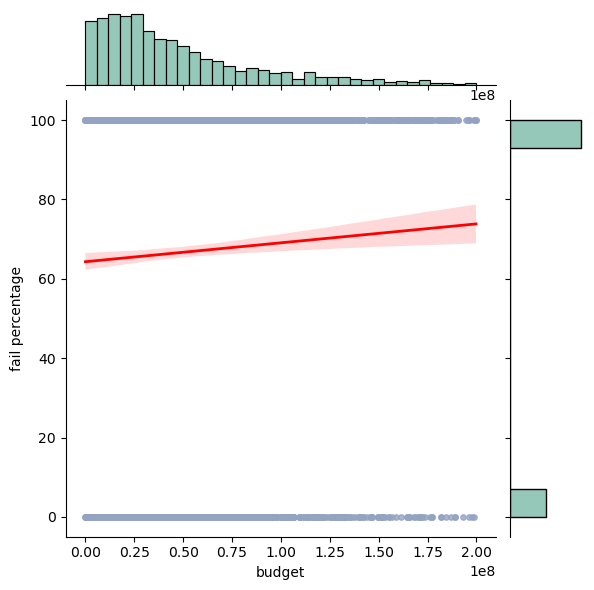

In [25]:
df_filtered['fail percentage'] = np.where(df_filtered['profitability'] > 1, 100, 0)
df_prof = df_filtered[df_filtered['budget'] < 200000000] 


plot = sns.jointplot(x=df_prof['budget'], y=df_prof['fail percentage'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

#To her surprise, lower budget movies seem to have a slightly lower success rate. Intrigued, she wants to find out how a movie budget affects profitability

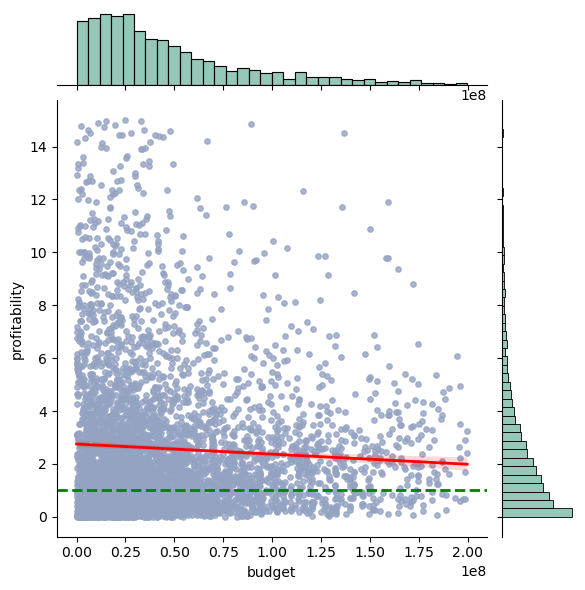

In [26]:
df_prof = df_filtered[df_filtered['budget'] < 200000000]

plot = sns.jointplot(x=df_prof['budget'], y=df_prof['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade
plot.ax_joint.axhline(1, color='green', linestyle='--', linewidth=2)


In [27]:
# Lower budget movies tend to be more profitable than high budget productions. She just realized the mess she put herself into : how to find the sweet spot to maximize 
# profitability while maximizing the chance to turn a profit? Fortunately, there are other factors to account for which might explain the variability in profitabilty.

## Hypothesis 2: Does movie runtime influence revenue?
assuming ticket prices are constant, people might prefer longer movies as they would get more watchtime per dollar spent. 

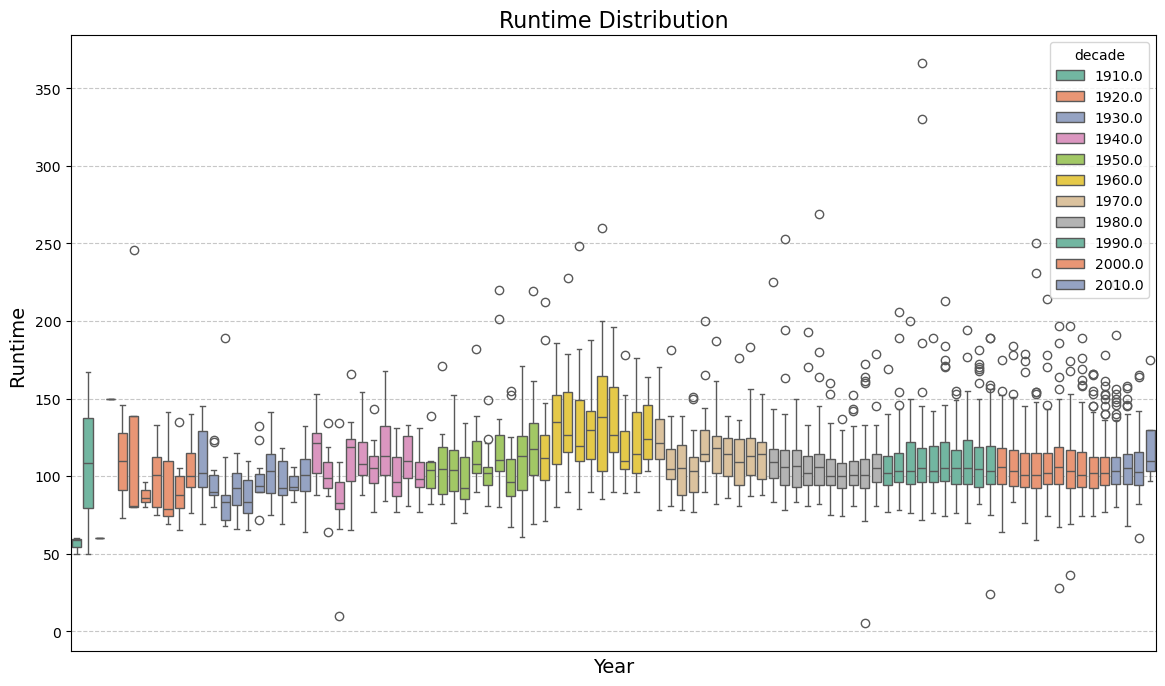

In [30]:
#df_filtered["Movie release year"] = df_filtered["Movie release year"].astype(int)

df_filtered = df_filtered[df_filtered['Movie runtime'] < 800]


plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release year",
    y="Movie runtime",
    data=df_filtered,
    legend = True,
    hue = "decade",
    palette="Set2"
)

plt.title("Runtime Distribution", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Runtime ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')
#plt.xticks(fontsize=6, rotation=45)
plt.xticks([])

plt.show()

#constant runtime through time, except in the 60s. She keeps it in mind to investigate later...

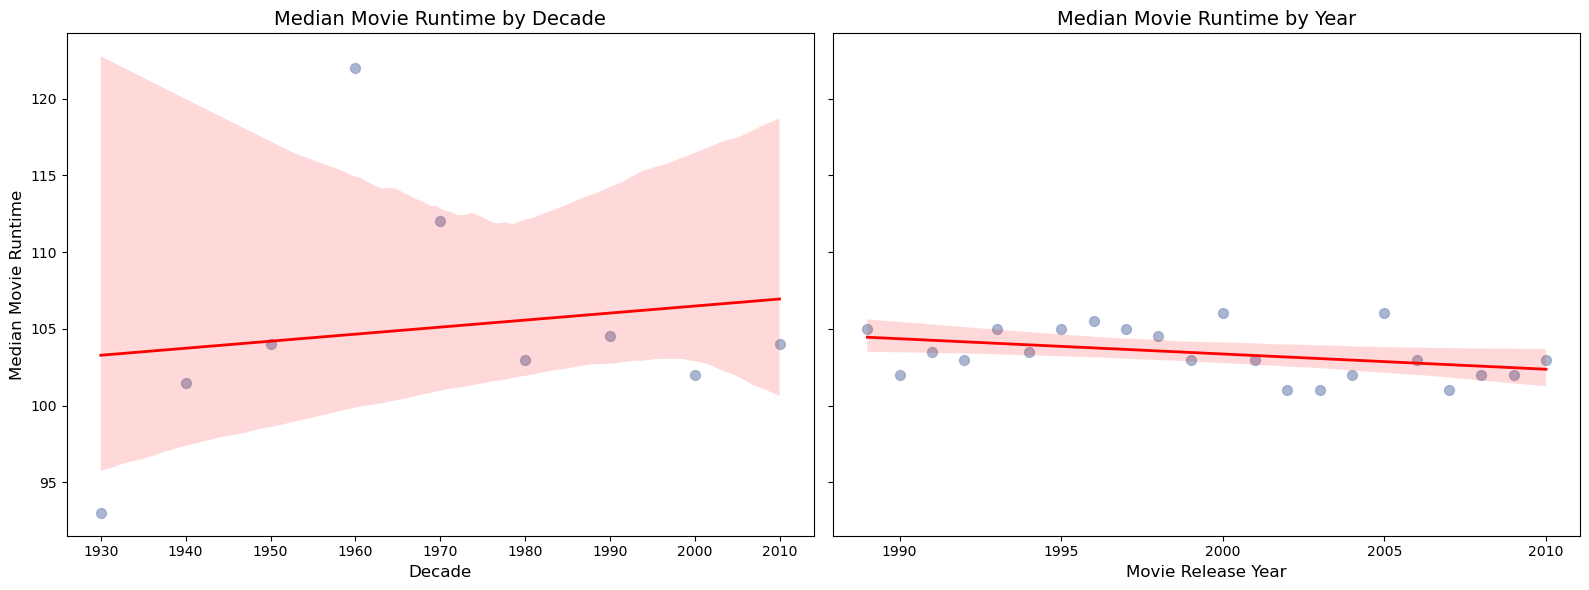

In [31]:
df_runtime_decade = df_filtered.dropna(subset=['Movie runtime', 'decade'])
df_runtime_decade = df_runtime_decade[df_runtime_decade['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_runtime_decade = df_runtime_decade[df_runtime_decade['Movie runtime'] < 300]
df_runtime_decade = df_runtime_decade[df_runtime_decade['decade'] > 1920]

# Group by decade and calculate the median runtime
median_runtime_per_decade = df_runtime_decade.groupby('decade')['Movie runtime'].median().reset_index()

# Second dataset: Median runtime by release year
df_runtime_year = df_filtered.dropna(subset=['Movie runtime', 'Movie release year'])
df_runtime_year = df_runtime_year[df_runtime_year['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_runtime_year = df_runtime_year[df_runtime_year['Movie release year'] > 1988]
df_runtime_year = df_runtime_year[df_runtime_year['Movie release year'] < 2011]

# Group by release year and calculate the median runtime
median_runtime_per_year = df_runtime_year.groupby('Movie release year')['Movie runtime'].median().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Regression on median runtime by decade
sns.regplot(
    x=median_runtime_per_decade['decade'], 
    y=median_runtime_per_decade['Movie runtime'], 
    ax=axes[0],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0].set_title("Median Movie Runtime by Decade", fontsize=14)
axes[0].set_xlabel("Decade", fontsize=12)
axes[0].set_ylabel("Median Movie Runtime", fontsize=12)

# Plot 2: Regression on median runtime by release year
sns.regplot(
    x=median_runtime_per_year['Movie release year'], 
    y=median_runtime_per_year['Movie runtime'], 
    ax=axes[1],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1].set_title("Median Movie Runtime by Year", fontsize=14)
axes[1].set_xlabel("Movie Release Year", fontsize=12)
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# There is no substantial change in runtime through the years hovering around the 100 minutes for every genre, except for family movies that became as long as other movies through time.


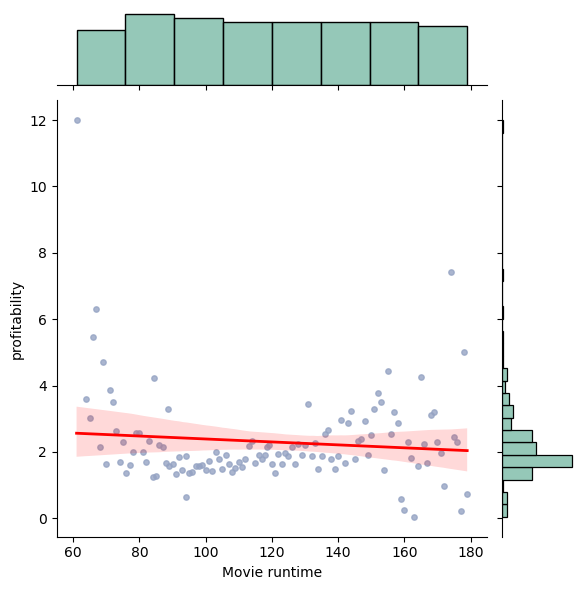

In [33]:
df_run = df_filtered[df_filtered['Movie runtime'] < 170]
df_run = df_run[df_run['Movie runtime'] > 70]

df_run = df_filtered[(df_filtered['Movie runtime'] < 180) & (df_filtered['Movie runtime'] > 60)]

# Group by runtime and calculate the median profitability
df_run_grouped = df_run.groupby('Movie runtime')['profitability'].median().reset_index()

plot = sns.jointplot(x=df_run_grouped['Movie runtime'], y=df_run_grouped['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade


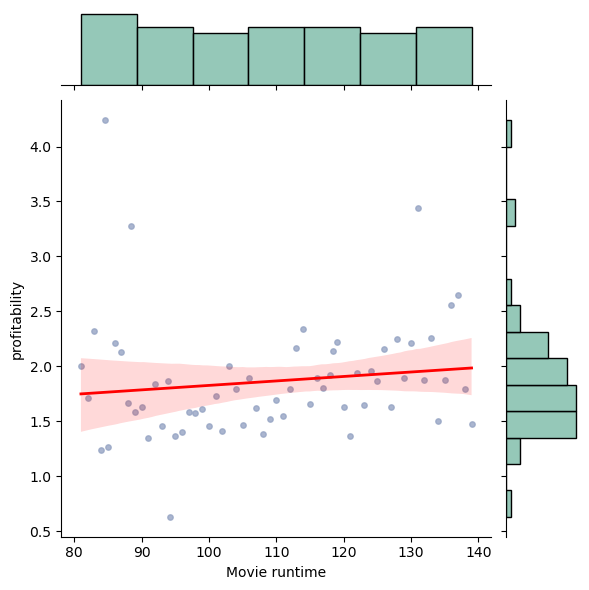

In [34]:
df_run = df_filtered[df_filtered['Movie runtime'] < 140]
df_run = df_run[df_run['Movie runtime'] > 80]


# Group by runtime and calculate the median profitability
df_run_grouped = df_run.groupby('Movie runtime')['profitability'].median().reset_index()

plot = sns.jointplot(x=df_run_grouped['Movie runtime'], y=df_run_grouped['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade


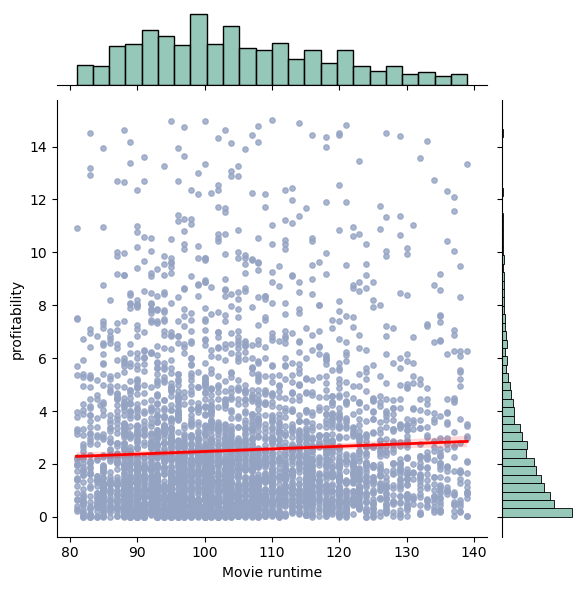

In [35]:
df_run = df_filtered[df_filtered['Movie runtime'] < 140]
df_run = df_run[df_run['Movie runtime'] > 80]

plot = sns.jointplot(x=df_run['Movie runtime'], y=df_run['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade
#plot.ax_joint.set_ylim(0, 3)
#plot.ax_joint.set_yscale('log')


In [36]:
#fairly constant, it does not seem to have an effect. Maybe a slight increase for longer movies. Next, Annabel wants to look into the movie release schedule, when are the most profitable movies releasing?

## Hypothesis 3: what is the most profitable release period?
First, Annebel investigates if within a month there are changes in release days, under the assumptions that people wait for their salary before going to the cinema, so there would be more watchers at the start of each month. 

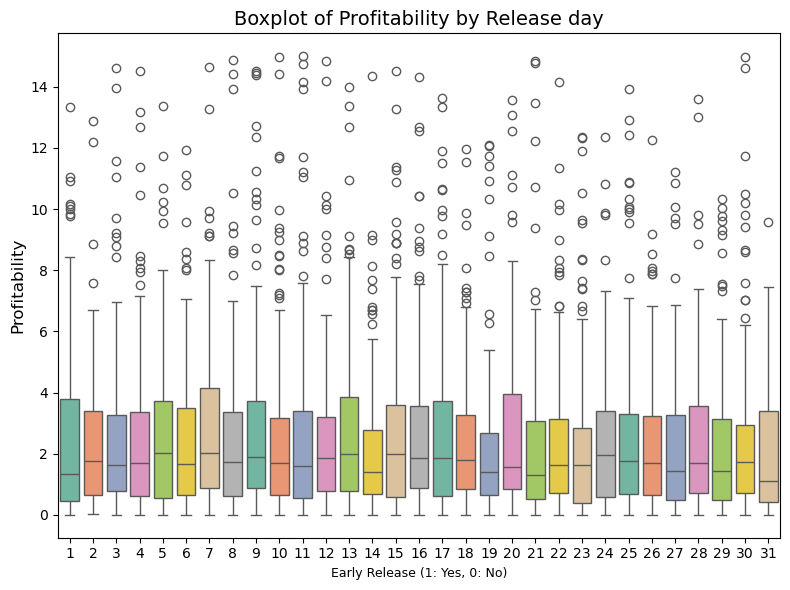

In [39]:
df_filtered['Movie release day'] = df_filtered['Movie release day'].astype(int)

df_prof = df_filtered[df_filtered['decade'] > 1950]

#df_prof = df_filtered[df_filtered['Movie genres'].apply(lambda x: 'Family Film' in x)]

# Create a boxplot of profitability by early or late release
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_prof['Movie release day'], 
    y=df_prof['profitability'], 
    hue = df_prof['Movie release day'],
    #palette=['#95a3c3'],
    palette='Set2',
    legend = None
)

# Customize plot appearance
plt.xlabel("Early Release (1: Yes, 0: No)", fontsize=9)
plt.ylabel("Profitability", fontsize=12)
plt.title("Boxplot of Profitability by Release day", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [40]:
#she observes no tendency or visible dependence :-( moving onto if some release months are more profitable 

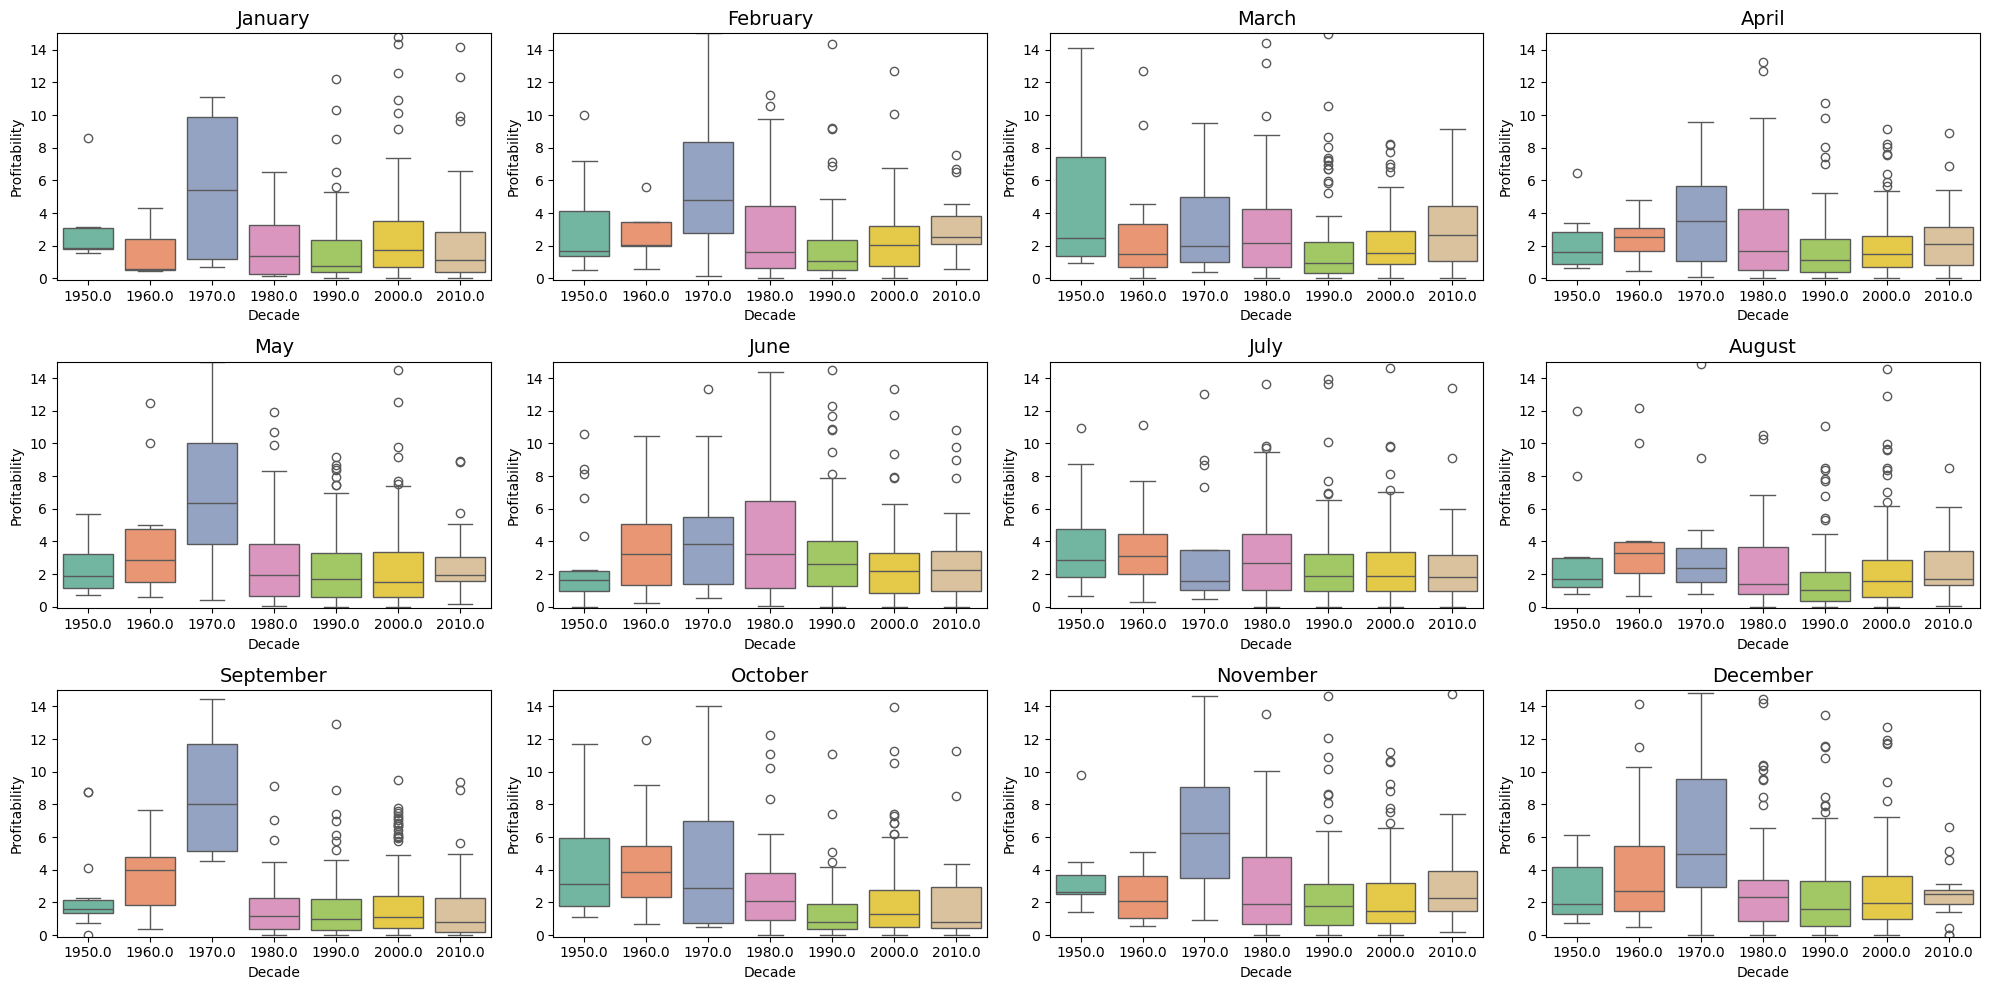

In [41]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

n_rows, n_cols = 3, 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

data_df = df_filtered[df_filtered['decade'] > 1940]
for i in range(12):
    ax = axes[i]
    
    # Filter the data for the current month
    month_data = data_df[data_df['Movie release month'] == i + 1]  # Assuming months are numbered 1-12 in the data
    
    # Create a boxplot
    sns.boxplot(
        x='decade',  # Replace with relevant x-axis variable if needed
        y='profitability',
        data=month_data,
        ax=ax,
        hue = "decade",
        palette='Set2',
        legend = None
        
    )
    
    ax.set_title(f"{months[i]}", fontsize=14)
    ax.set_xlabel('Decade')  # Adjust the label if necessary
    ax.set_ylabel('Profitability')
    ax.set_ylim(-0.1, 15)
# Remove empty subplots if data does not fill all grid cells
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

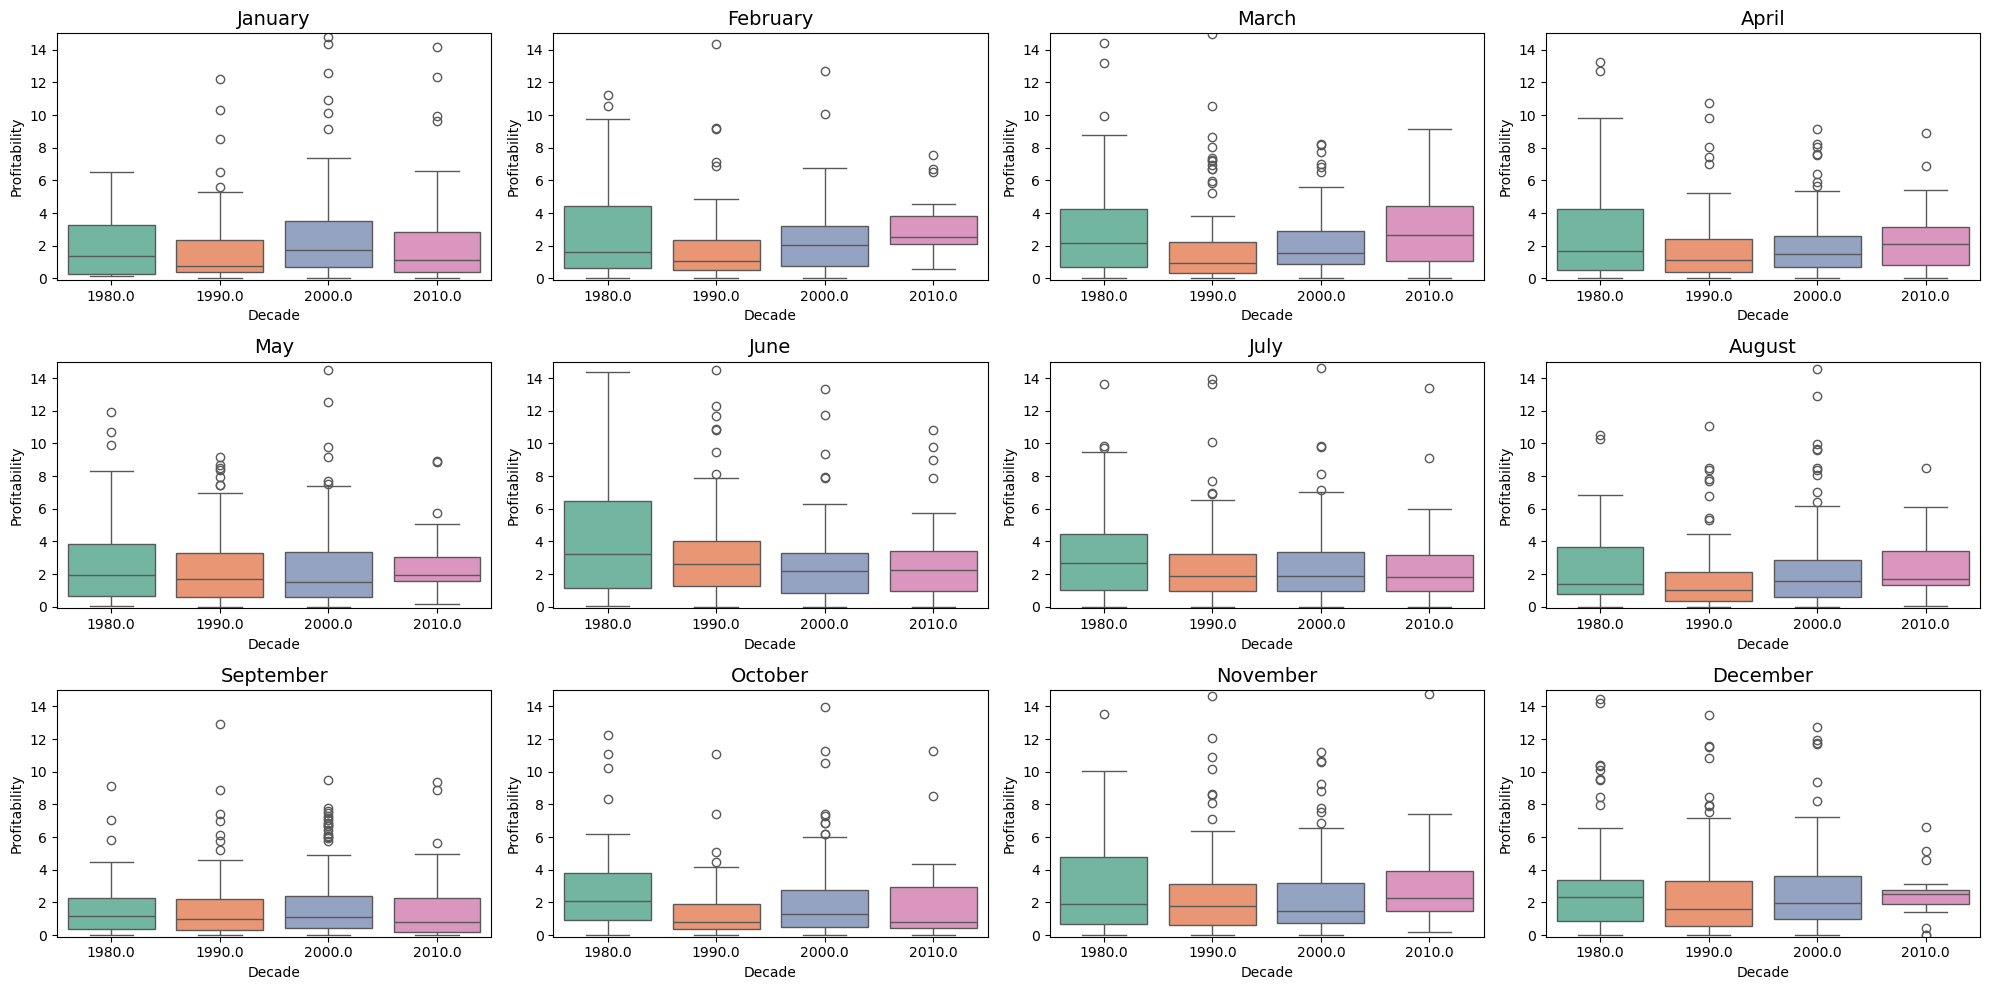

In [42]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

n_rows, n_cols = 3, 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

data_df = df_filtered[df_filtered['decade'] > 1970]
for i in range(12):
    ax = axes[i]
    
    # Filter the data for the current month
    month_data = data_df[data_df['Movie release month'] == i + 1]  # Assuming months are numbered 1-12 in the data
    
    # Create a boxplot
    sns.boxplot(
        x='decade',  # Replace with relevant x-axis variable if needed
        y='profitability',
        data=month_data,
        ax=ax,
        hue = "decade",
        palette='Set2',
        legend = None
        
    )
    
    ax.set_title(f"{months[i]}", fontsize=14)
    ax.set_xlabel('Decade')  # Adjust the label if necessary
    ax.set_ylabel('Profitability')
    ax.set_ylim(-0.1, 15)
# Remove empty subplots if data does not fill all grid cells
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

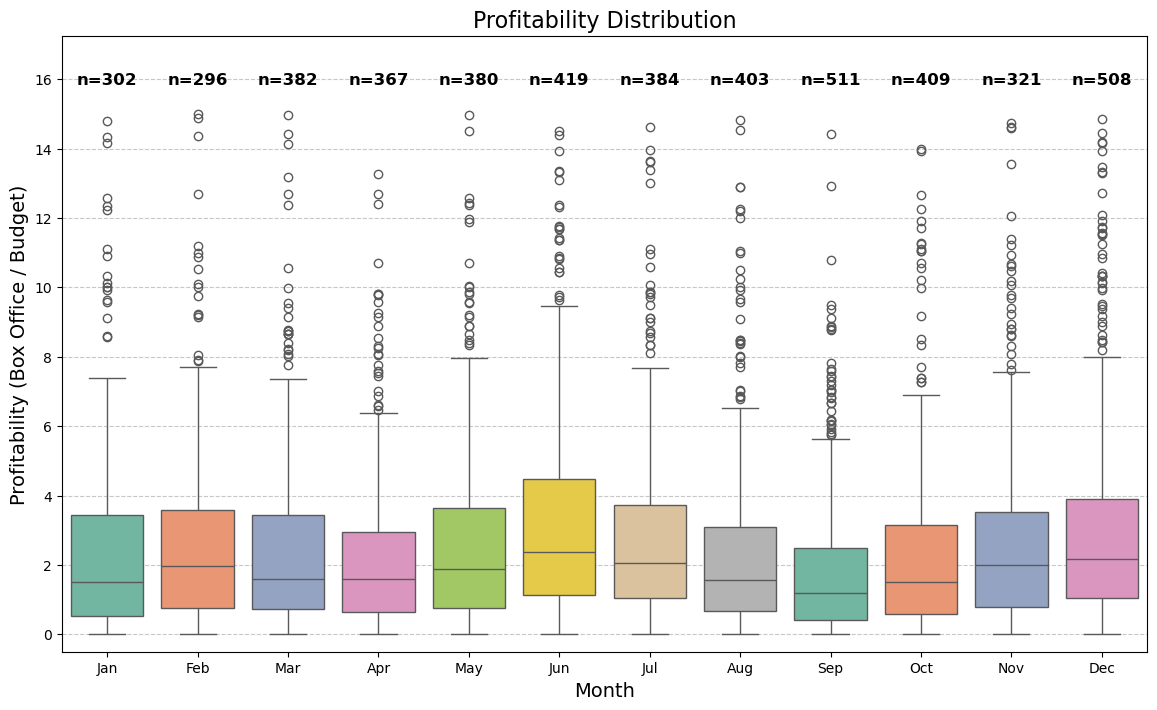

In [43]:
counts = df_filtered['Movie release month'].value_counts().sort_index()

# Step 2: Create the boxplot
plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release month",
    y="profitability",
    data=df_filtered,
    legend = False,
    hue = "Movie release month",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()  # Get current axes
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(
        i, 
        y_max + 0.05 * y_range,  
        f'n={count}', 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.linspace(0,11,12), labels=month_names)

plt.show()

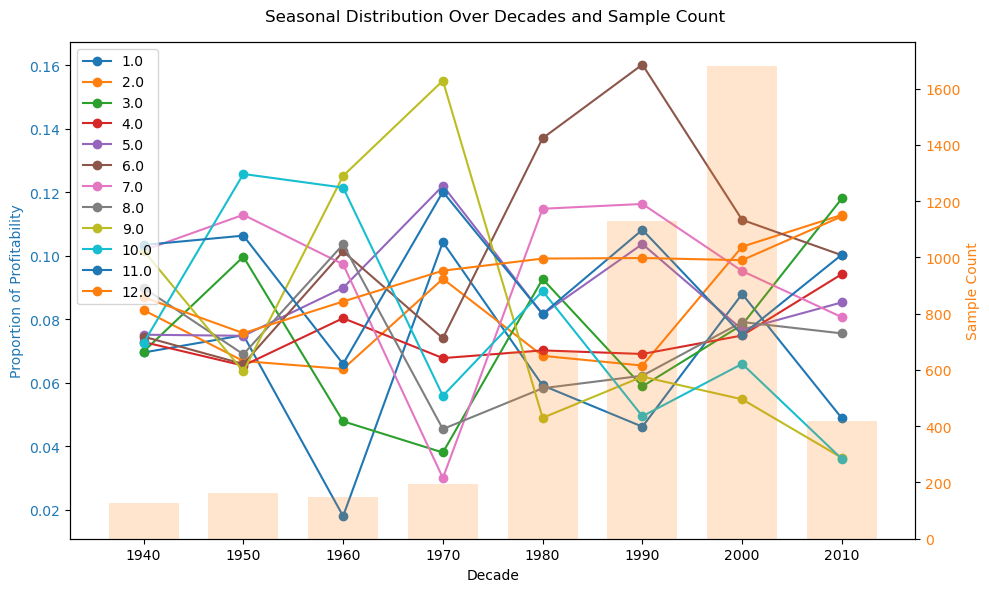

In [44]:
df_data = df_filtered[df_filtered['decade']>1930]


heatmap_data = df_data.pivot_table(
    index="decade", 
    columns="Movie release month", 
    values="profitability", 
    aggfunc="median"
).fillna(0)  # Replace NaN with 0 for display

# Normalize profitability per decade (row-wise normalization)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)





counts = df_data['decade'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Revenue
ax1.set_xlabel("Decade")
ax1.set_ylabel("Proportion of Profitability", color="tab:blue")
for season in np.linspace(1,12,12):
    ax1.plot(heatmap_data_normalized.index, heatmap_data_normalized[season], label=season, marker='o')
#ax1.tick_params(axis='x', heatmap_data_normalized.index, rotation=45)
ax1.grid(False)
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.legend()

# Plot Sample Count on a secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("Sample Count", color="tab:orange")
ax2.bar(counts.index, counts, color="tab:orange", alpha=0.2, label="Sample Count",width=7)
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Add a title and layout adjustments
fig.suptitle("Seasonal Distribution Over Decades and Sample Count")
fig.tight_layout()
plt.show()

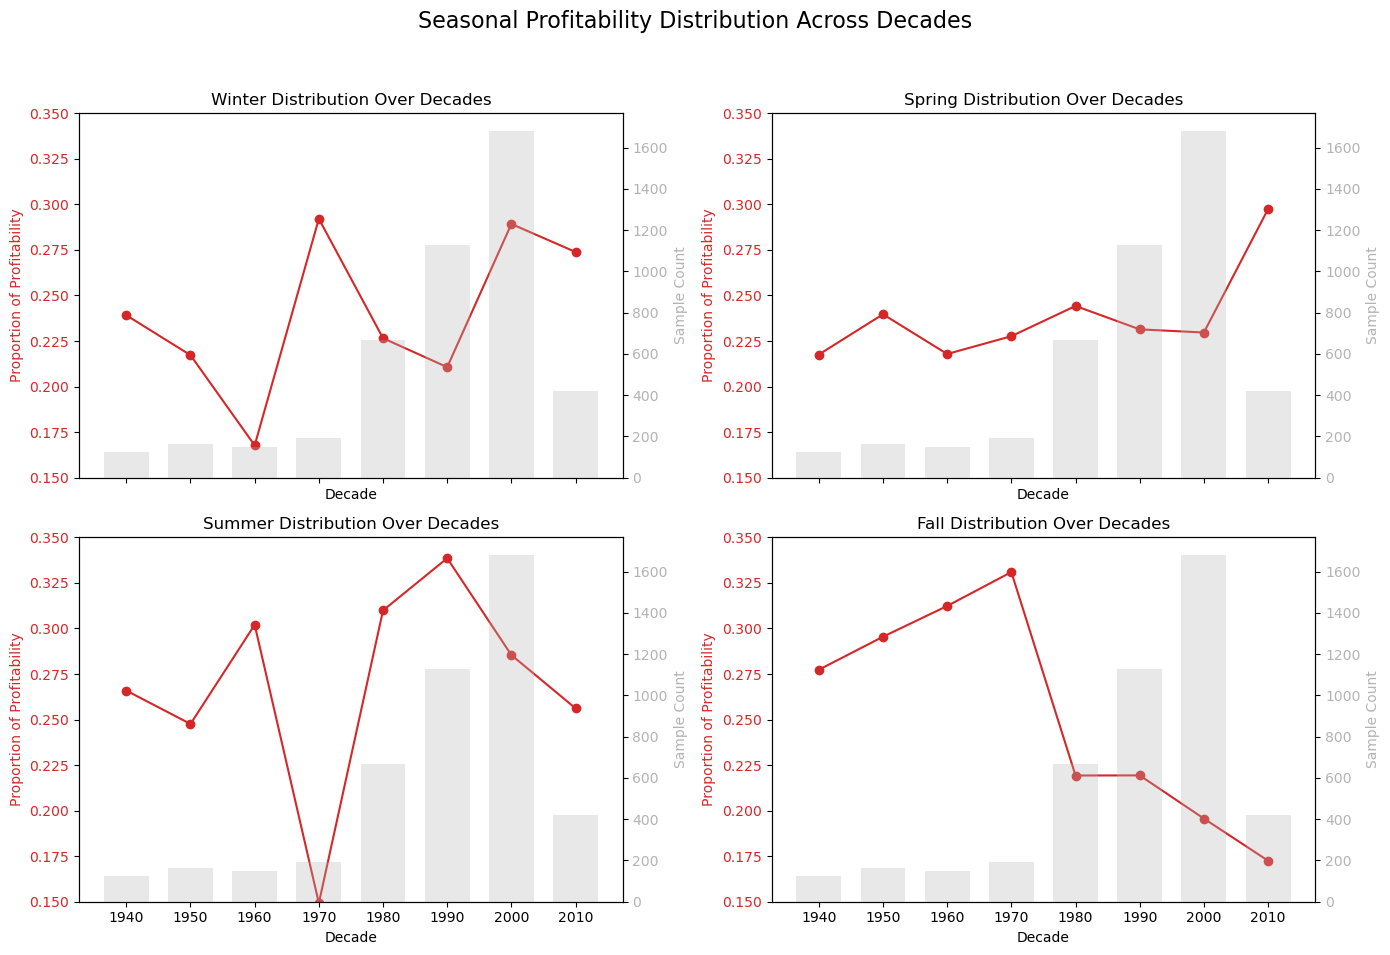

In [45]:
# Define seasons and corresponding months


seasons = {
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}

# Create subplots for each season
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
axes = axes.flatten()

for i, (season_name, months) in enumerate(seasons.items()):
    ax1 = axes[i]
    # Aggregate data for the specific season
    season_data = heatmap_data_normalized[months].sum(axis=1)
    
    # Plot the proportion of profitability for the season
    ax1.plot(
        heatmap_data_normalized.index,
        season_data,
        label=f"{season_name} (Profitability)",
        marker="o",
        color="tab:red"
    )
    ax1.set_title(f"{season_name} Distribution Over Decades", fontsize=12)
    ax1.set_xlabel("Decade")
    ax1.set_ylabel("Proportion of Profitability", color="tab:red")
    ax1.tick_params(axis="y", labelcolor="tab:red")
    ax1.set_ylim(0.15, 0.35)
    # Plot sample counts on a secondary axis
    ax2 = ax1.twinx()
    ax2.bar(
        counts.index,
        counts,
        color="#b3b3b3",
        alpha=0.3,
        width=7,
        label="Sample Count"
    )
    ax2.set_ylabel("Sample Count", color="#b3b3b3")
    ax2.tick_params(axis="y", labelcolor="#b3b3b3")

# Adjust layout and add a title
fig.suptitle("Seasonal Profitability Distribution Across Decades", fontsize=16)
#fig.supxlabel("Decade", fontsize=14)
#fig.supylabel("Proportion of Profitability", fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

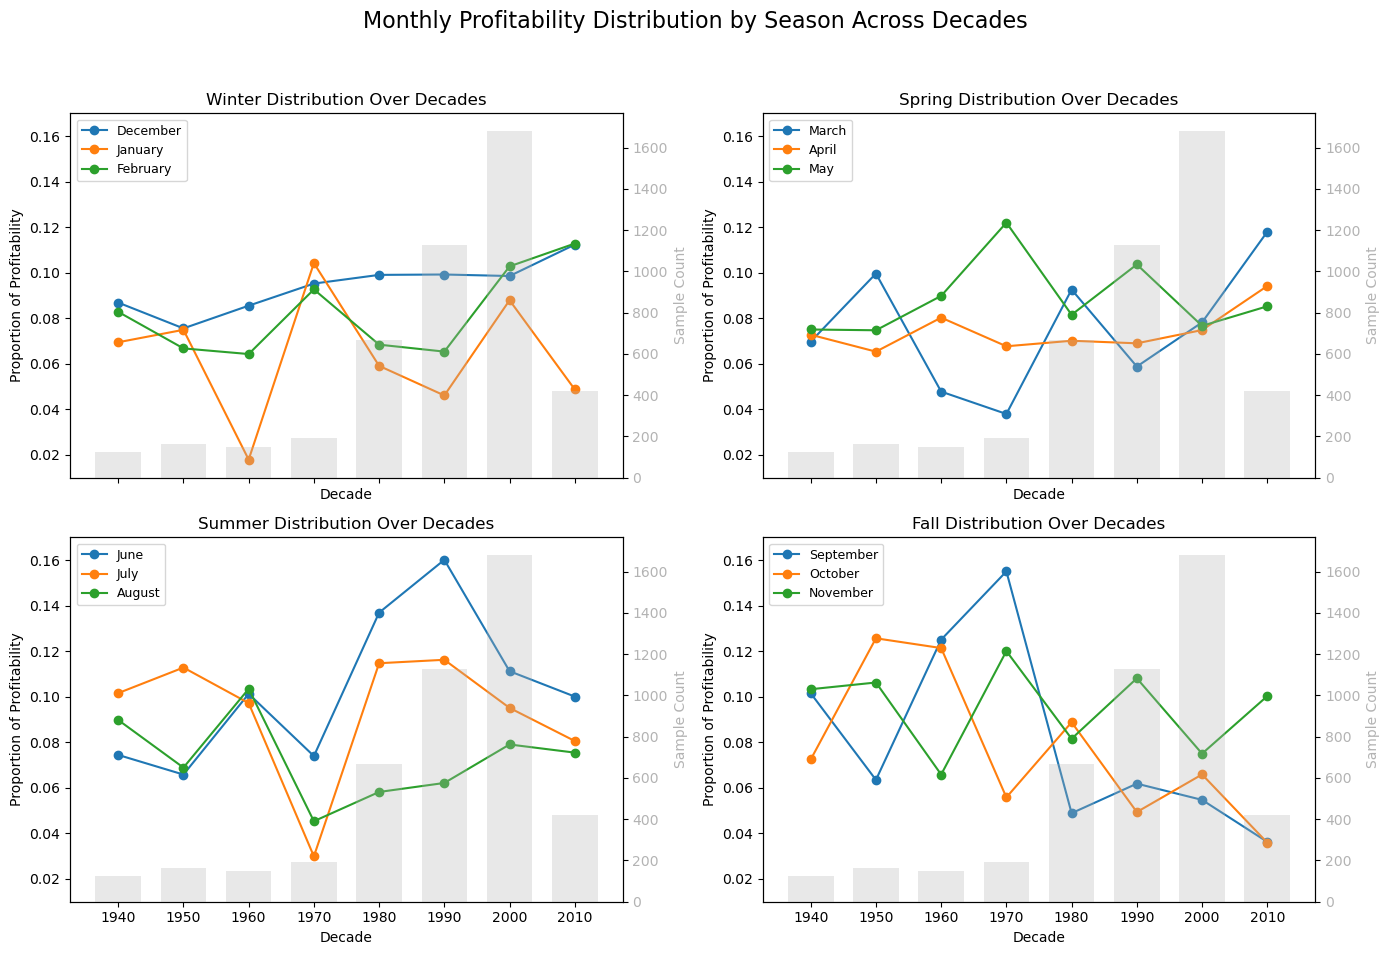

In [46]:
seasons = {
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}

month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May",
    6: "June", 7: "July", 8: "August", 9: "September", 10: "October",
    11: "November", 12: "December"
}

# Create subplots for each season
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
axes = axes.flatten()

for i, (season_name, months) in enumerate(seasons.items()):
    ax1 = axes[i]
    # Plot each month's line within the season with renamed labels
    for month in months:
        ax1.plot(
            heatmap_data_normalized.index,
            heatmap_data_normalized[month],
            label=month_names[month],
            marker="o"
        )
    
    # Add season-specific title and labels
    ax1.set_title(f"{season_name} Distribution Over Decades", fontsize=12)
    ax1.set_xlabel("Decade")
    ax1.set_ylabel("Proportion of Profitability")
    ax1.legend(loc="upper left", fontsize=9)
    ax1.set_ylim(0.01, 0.17)
    
    # Secondary axis for sample count
    ax2 = ax1.twinx()
    ax2.bar(
        counts.index,
        counts,
        color="#b3b3b3",
        alpha=0.3,
        width=7,
        label="Sample Count"
    )
    ax2.set_ylabel("Sample Count", color="#b3b3b3")
    ax2.tick_params(axis="y", labelcolor="#b3b3b3")

# Adjust layout and add a title for the entire figure
fig.suptitle("Monthly Profitability Distribution by Season Across Decades", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [47]:
#we can observe peaks in profitability in june and december, regardless of the year. Draw conclusion on more specific months. We will dive deeper into potential reasons for the shifting values later,
# Now Annabel is wondering, how does genre influence profitability? surely some genres are more popular profitable than others, as they have a larger public ...

## Hypothesis 4: Some genres or themes are more popular and might draw more spectators


In [49]:
#First annabel ask herself, how did the genres evolve through time? Surely the current most popular genres did not match the ones of 100 years ago. 

In [50]:
df_exploded.shape

(26037, 19)

In [51]:
df_genres = df_exploded.groupby(['decade', 'Movie genres']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['decade', 'Movie genres', 'count']
df_genres['total'] = df_genres.groupby('decade')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Movie genres'] = df_genres['Movie genres'].astype(str)


df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)


#df_genres = df_genres.loc[df_genres['percentage'] >= 3]

df_genres

decade      Movie genres  count  total  percentage
0    1910.0             Drama      3     19   15.789474
1    1910.0             Indie      5     19   26.315789
2    1920.0            Action      3    195    1.538462
3    1920.0  Action/Adventure      2    195    1.025641
4    1920.0         Adventure      6    195    3.076923
..      ...               ...    ...    ...         ...
96   2010.0             Drama    208   1791   11.613624
97   2010.0       Family Film     48   1791    2.680067
98   2010.0             Indie     30   1791    1.675042
99   2010.0      Romance Film     87   1791    4.857621
100  2010.0          Thriller    144   1791    8.040201

[101 rows x 5 columns]

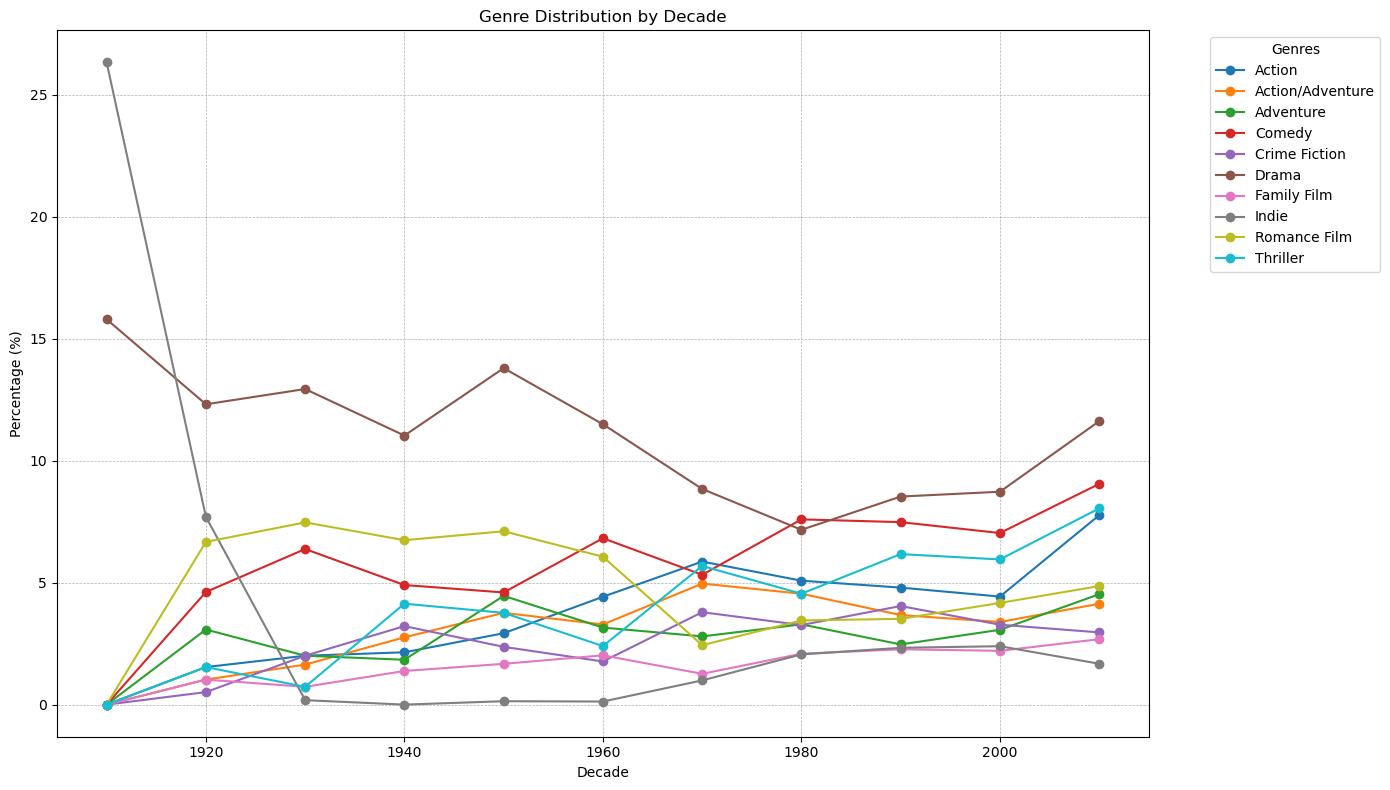

In [52]:
pivot_table = df_genres.pivot(index='decade', columns='Movie genres', values='percentage').fillna(0)

# Add an "Other" category if it doesn't already exist
#if 'Other' not in pivot_table.columns:
#    pivot_table['Other'] = 100 - pivot_table.sum(axis=1)

# Plot the stacked bar chart
pivot_table.plot(kind='line', figsize=(14, 8), marker='o')

plt.title("Genre Distribution by Decade")
plt.xlabel("Decade")
plt.ylabel("Percentage (%)")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#changer pour 10 most popular genres

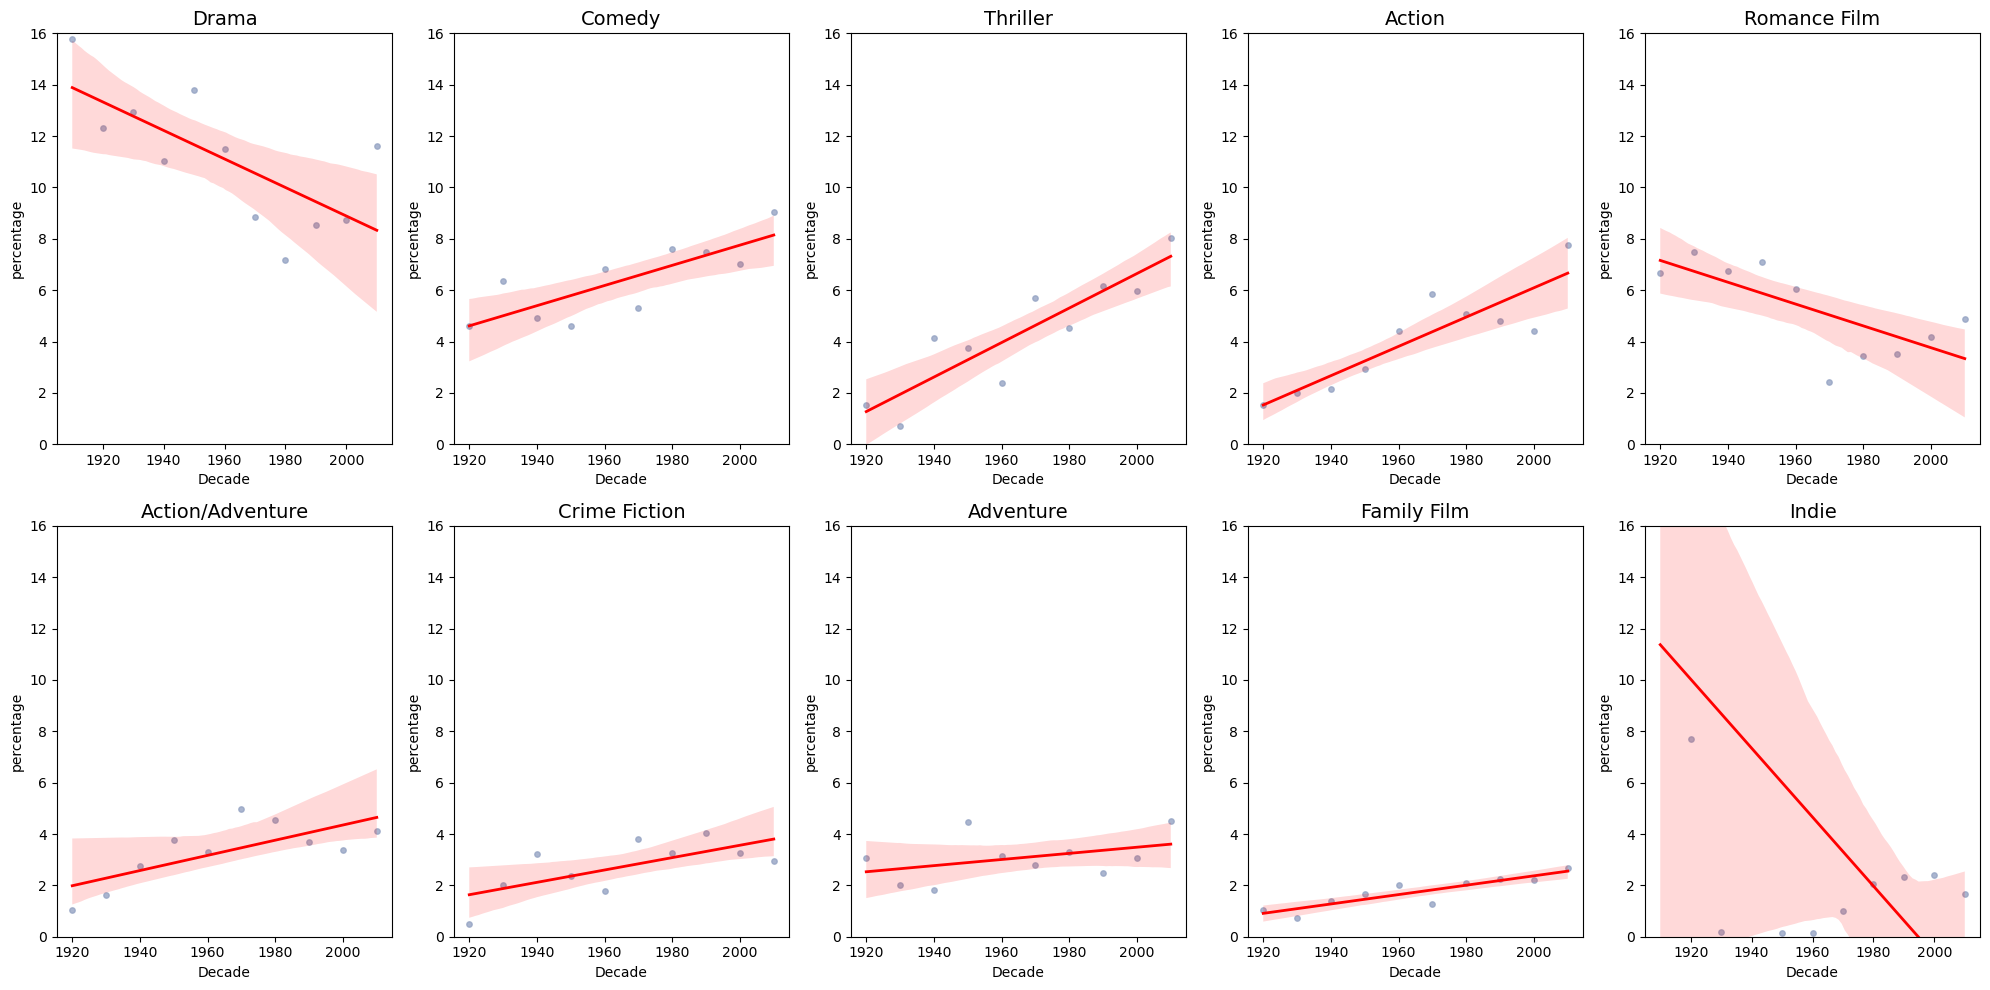

In [53]:
df_genres = df_exploded.groupby(['decade', 'Movie genres']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['decade', 'Movie genres', 'count']
df_genres['total'] = df_genres.groupby('decade')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Movie genres'] = df_genres['Movie genres'].astype(str)


df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='decade',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Decade')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

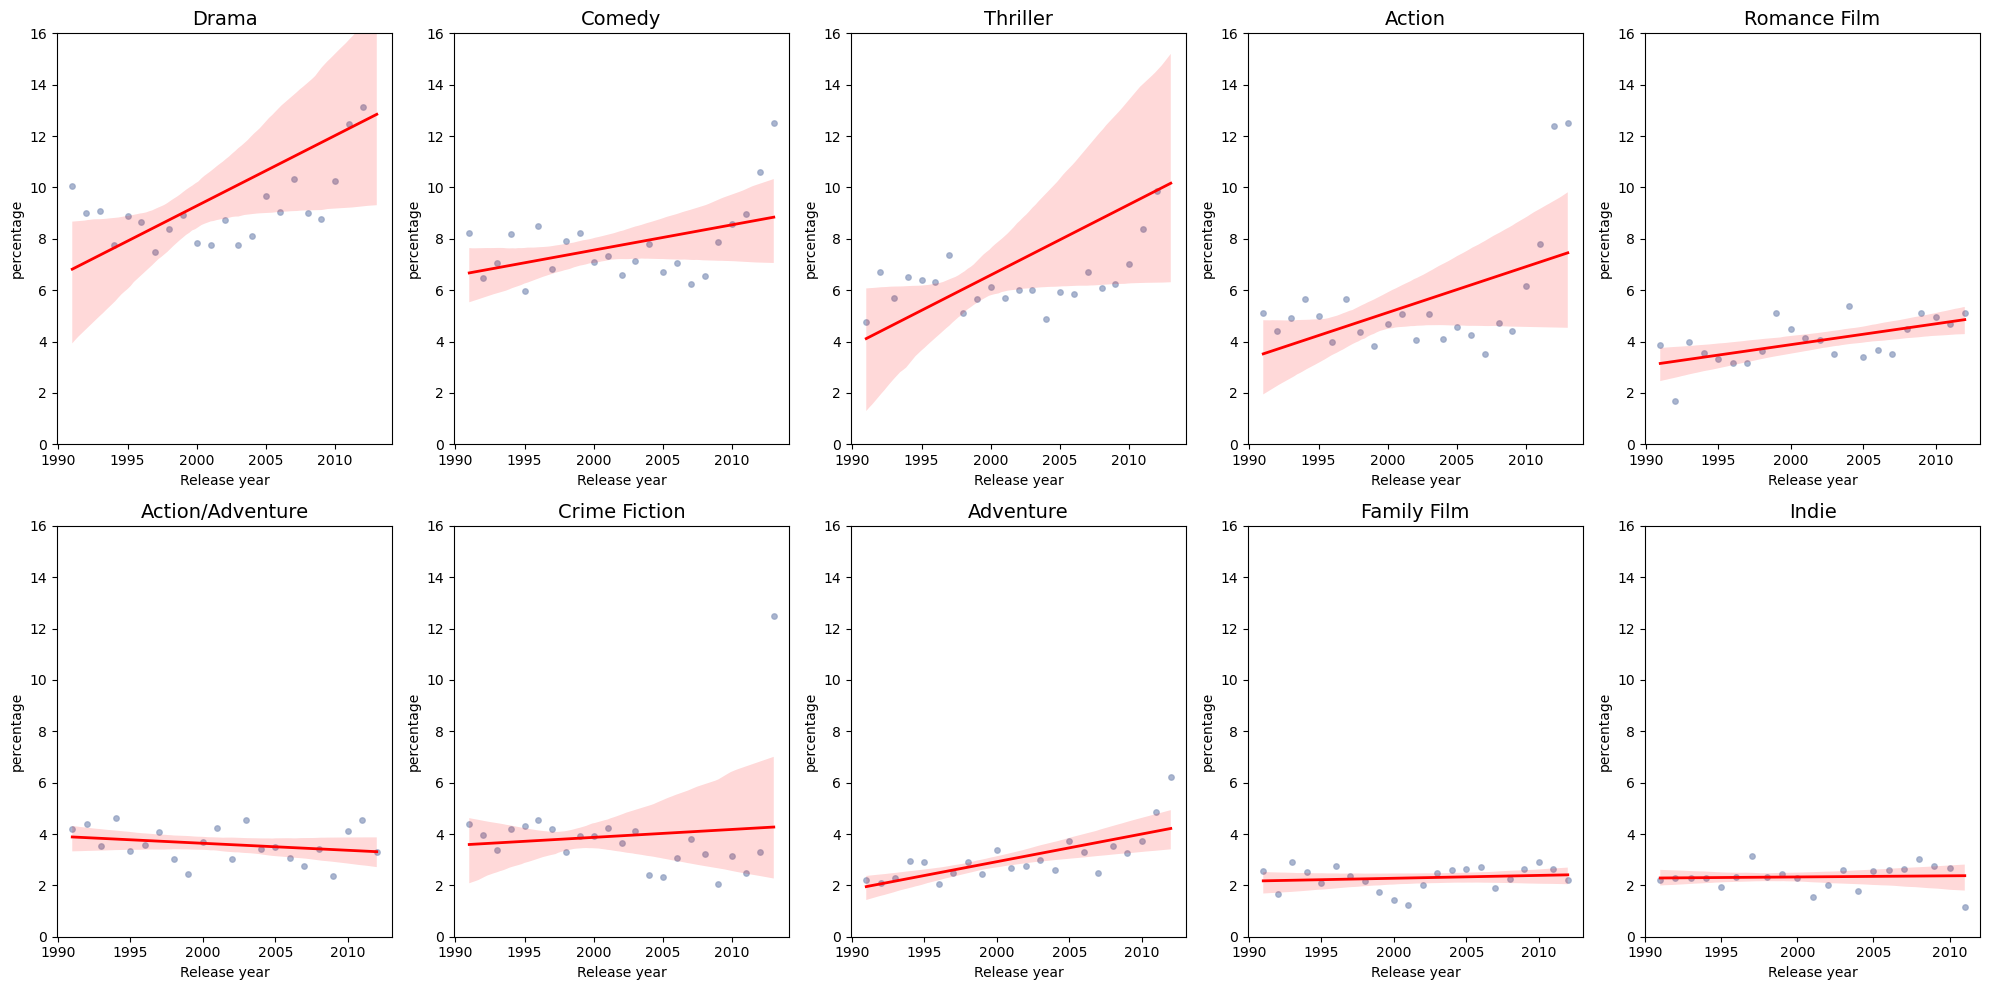

In [54]:
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['Movie release year', 'Movie genres', 'count']
df_genres['total'] = df_genres.groupby('Movie release year')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Movie genres'] = df_genres['Movie genres'].astype(str)

df_genres = df_genres[df_genres['Movie release year'] > 1990]
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Release year')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

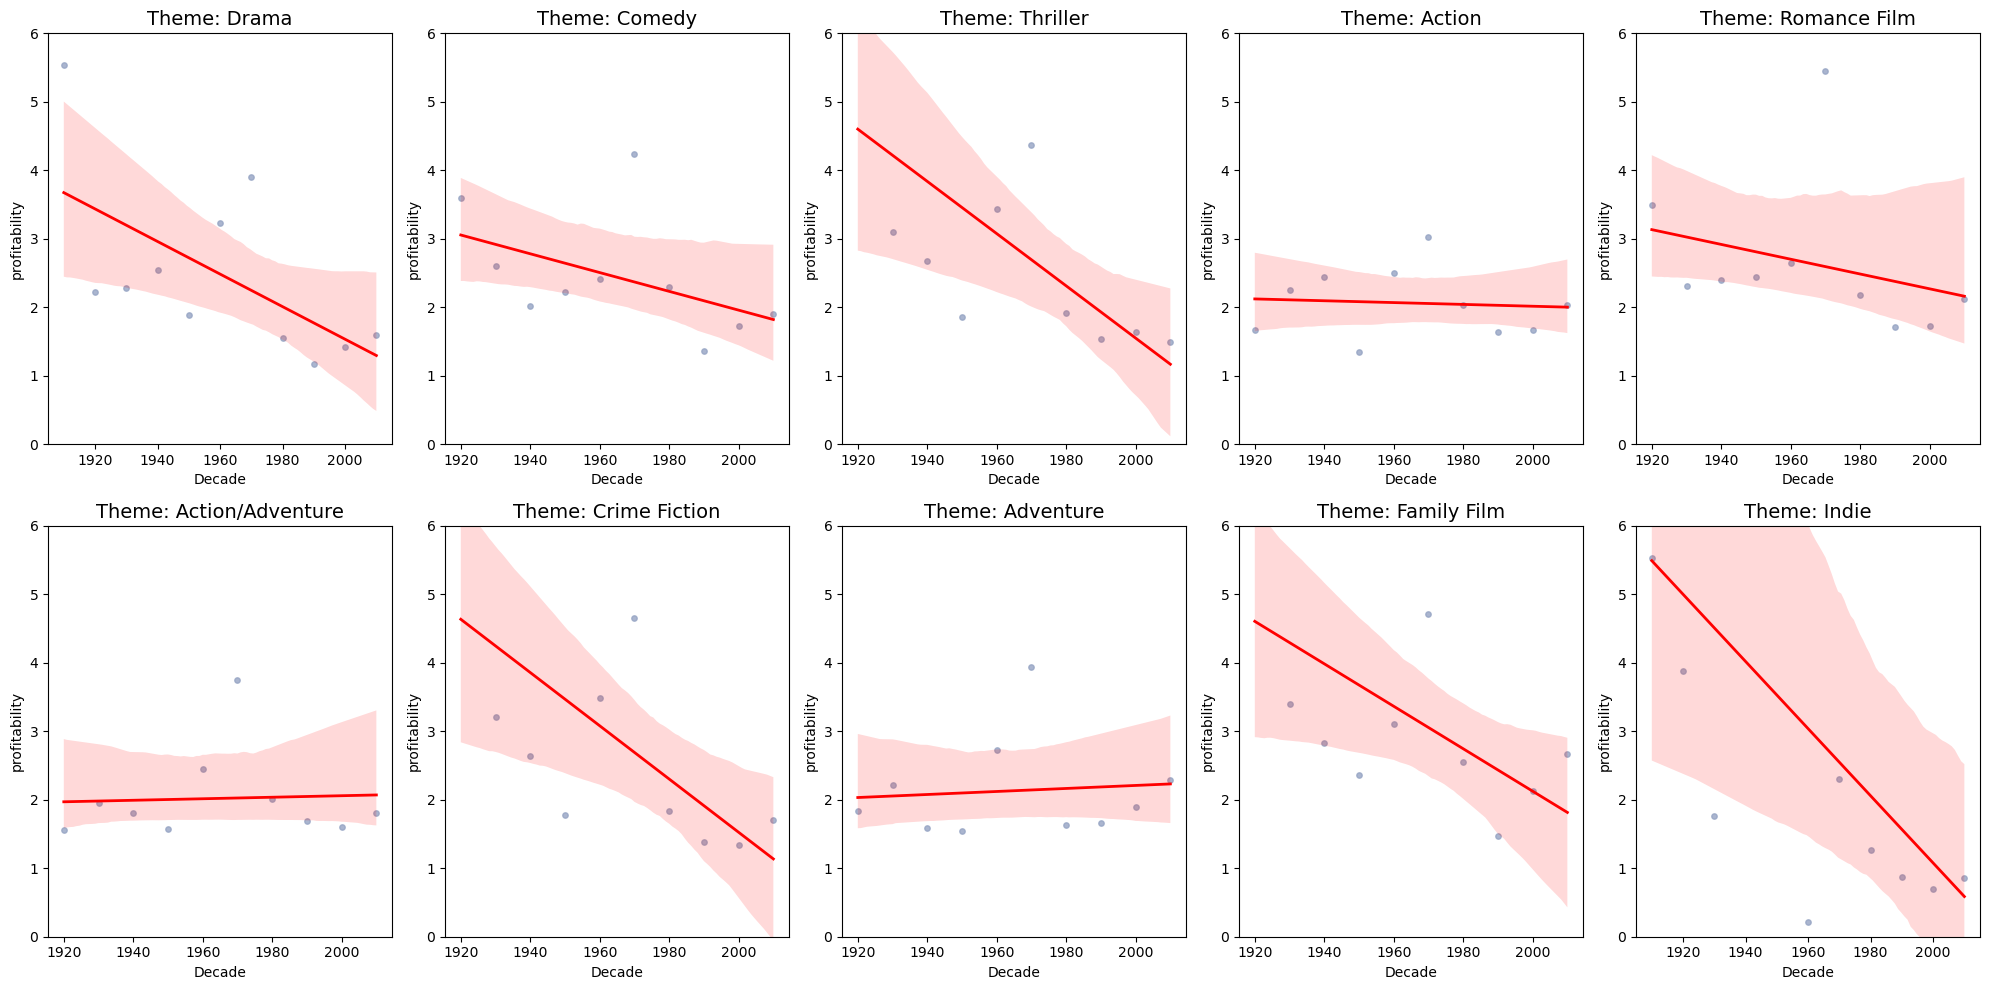

In [55]:
df_genres = df_exploded.groupby(['decade', 'Movie genres'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
#df_genres = df_genres[df_genres['Movie release year'] > 1995]
df_genres = df_genres[df_genres['decade'] > 1900]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='decade',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"Theme: {theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Decade')
    ax.set_ylabel('profitability')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


#WE DONT HAVE ENOUGH DATA IN THE EARLIER YEARS to have meaningful year-averages, so we take decade averages. Action and adventure movies seem to have constant profitability while other decreases
# Lets refine the regression over the last 2 decades where we have enough data to use the yearly medians. 

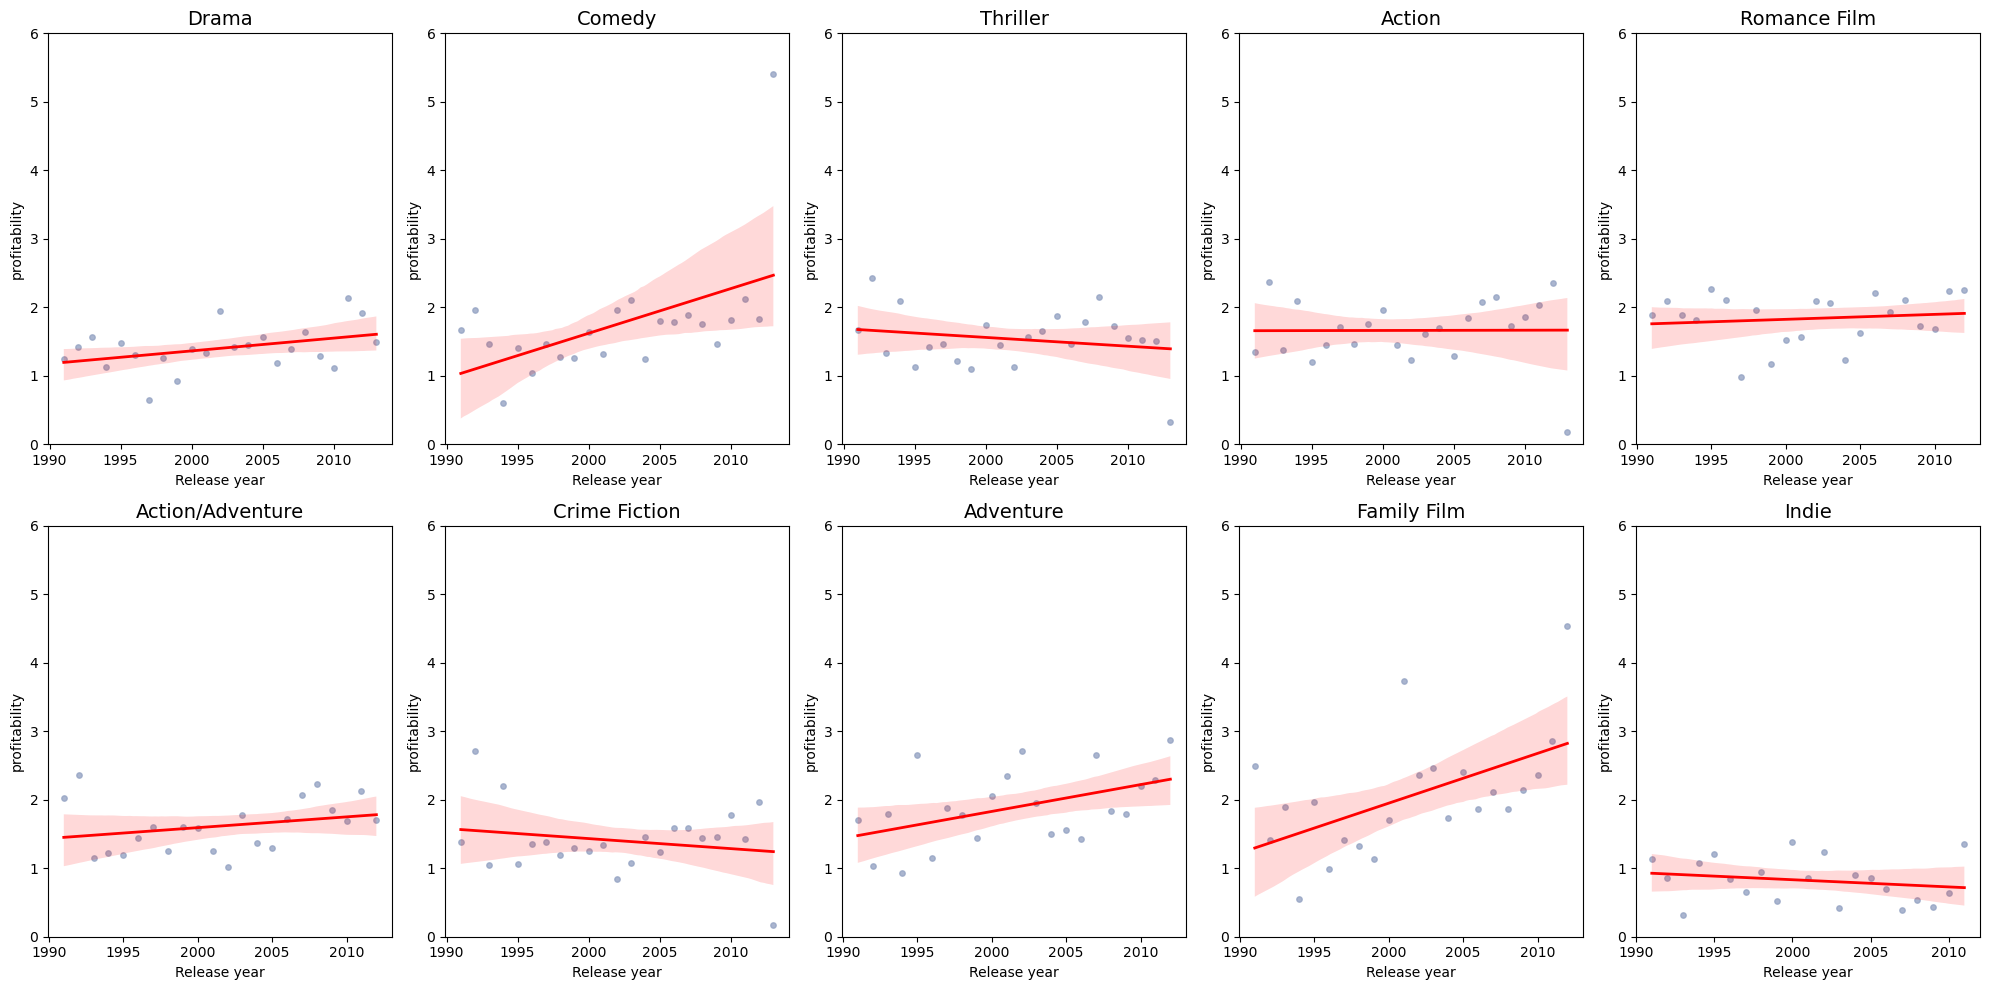

In [56]:
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('profitability')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Family films rise in popularity, which grows together with the number of family movies made. Then, comedy movies are better and finally, indie is shit


In [57]:
top_10_themes

Theme
Redemption    635
Betrayal      289
Love          270
Survival      242
Revenge       235
Friendship    164
Identity      148
Deception     125
Resilience     89
Adventure      84
Name: count, dtype: int64

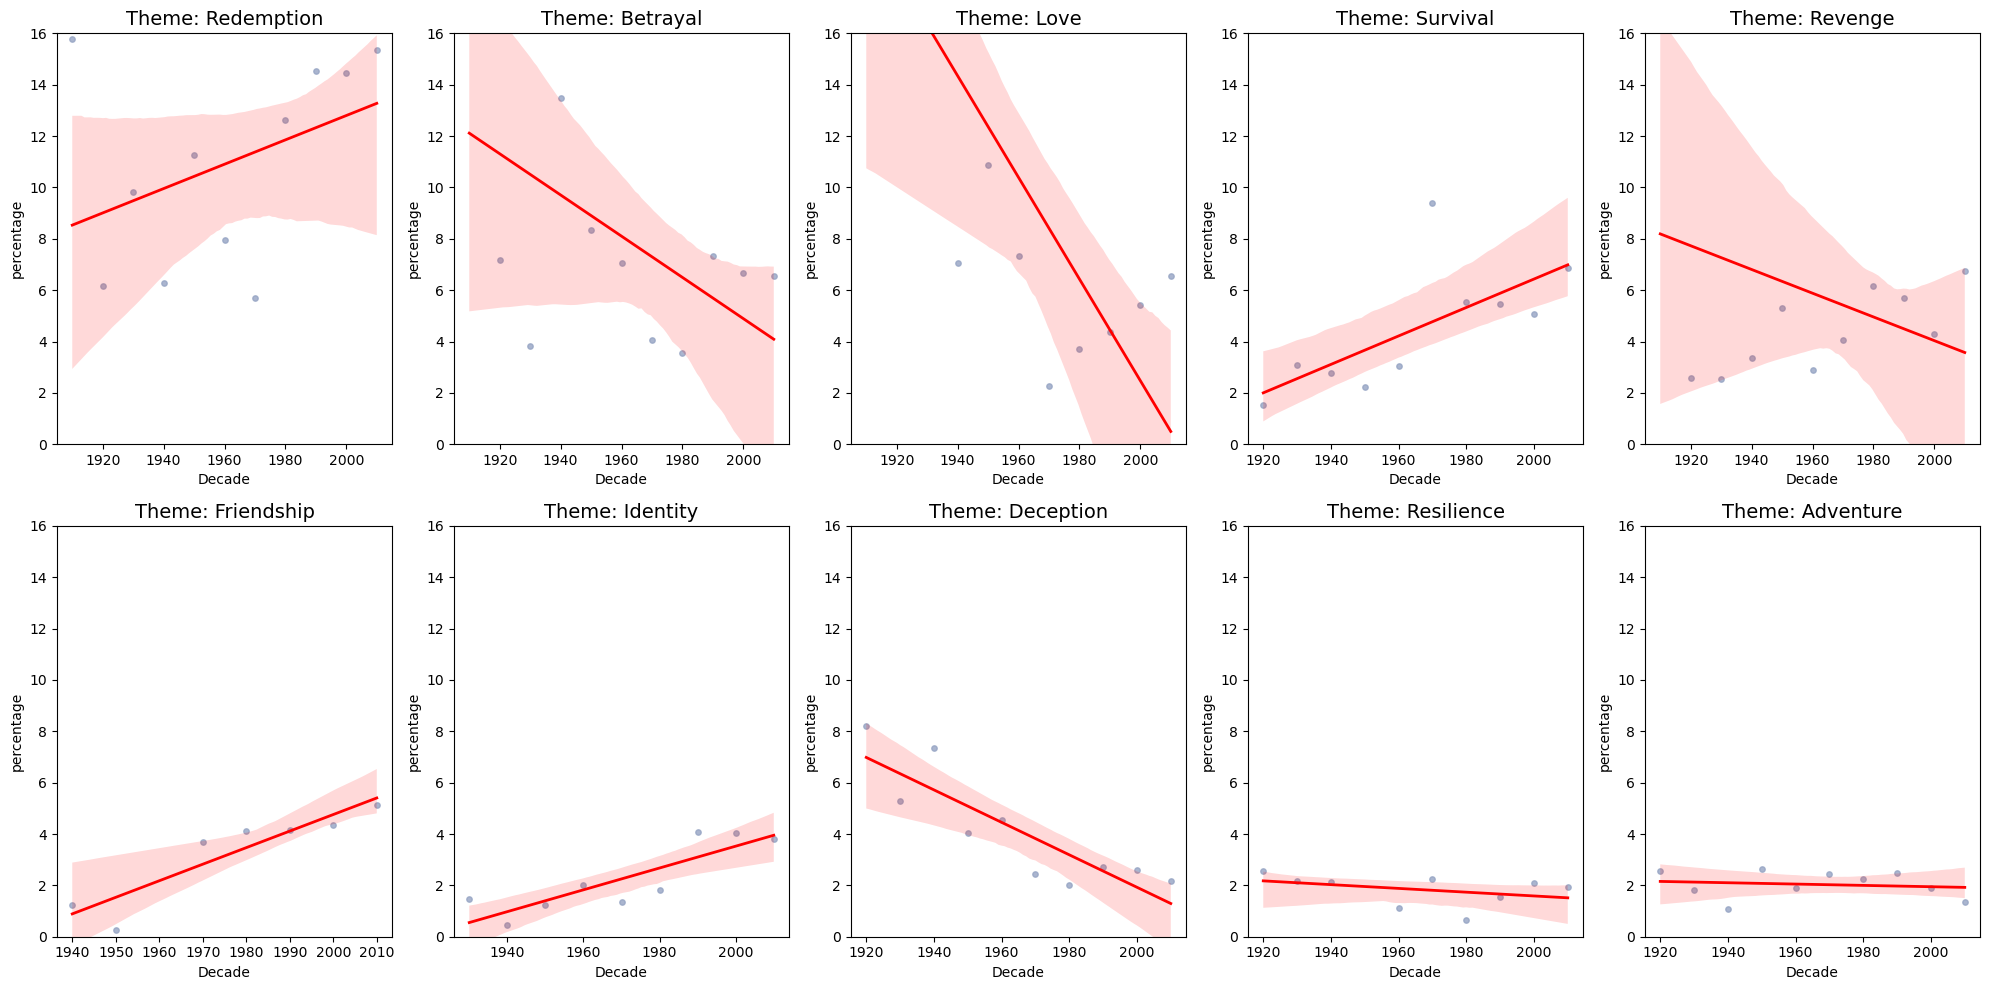

In [58]:
df_genres = df_exploded.groupby(['decade', 'Theme']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['decade', 'Theme', 'count']
df_genres['total'] = df_genres.groupby('decade')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Theme'] = df_genres['Theme'].astype(str)


df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='decade',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"Theme: {theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Decade')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

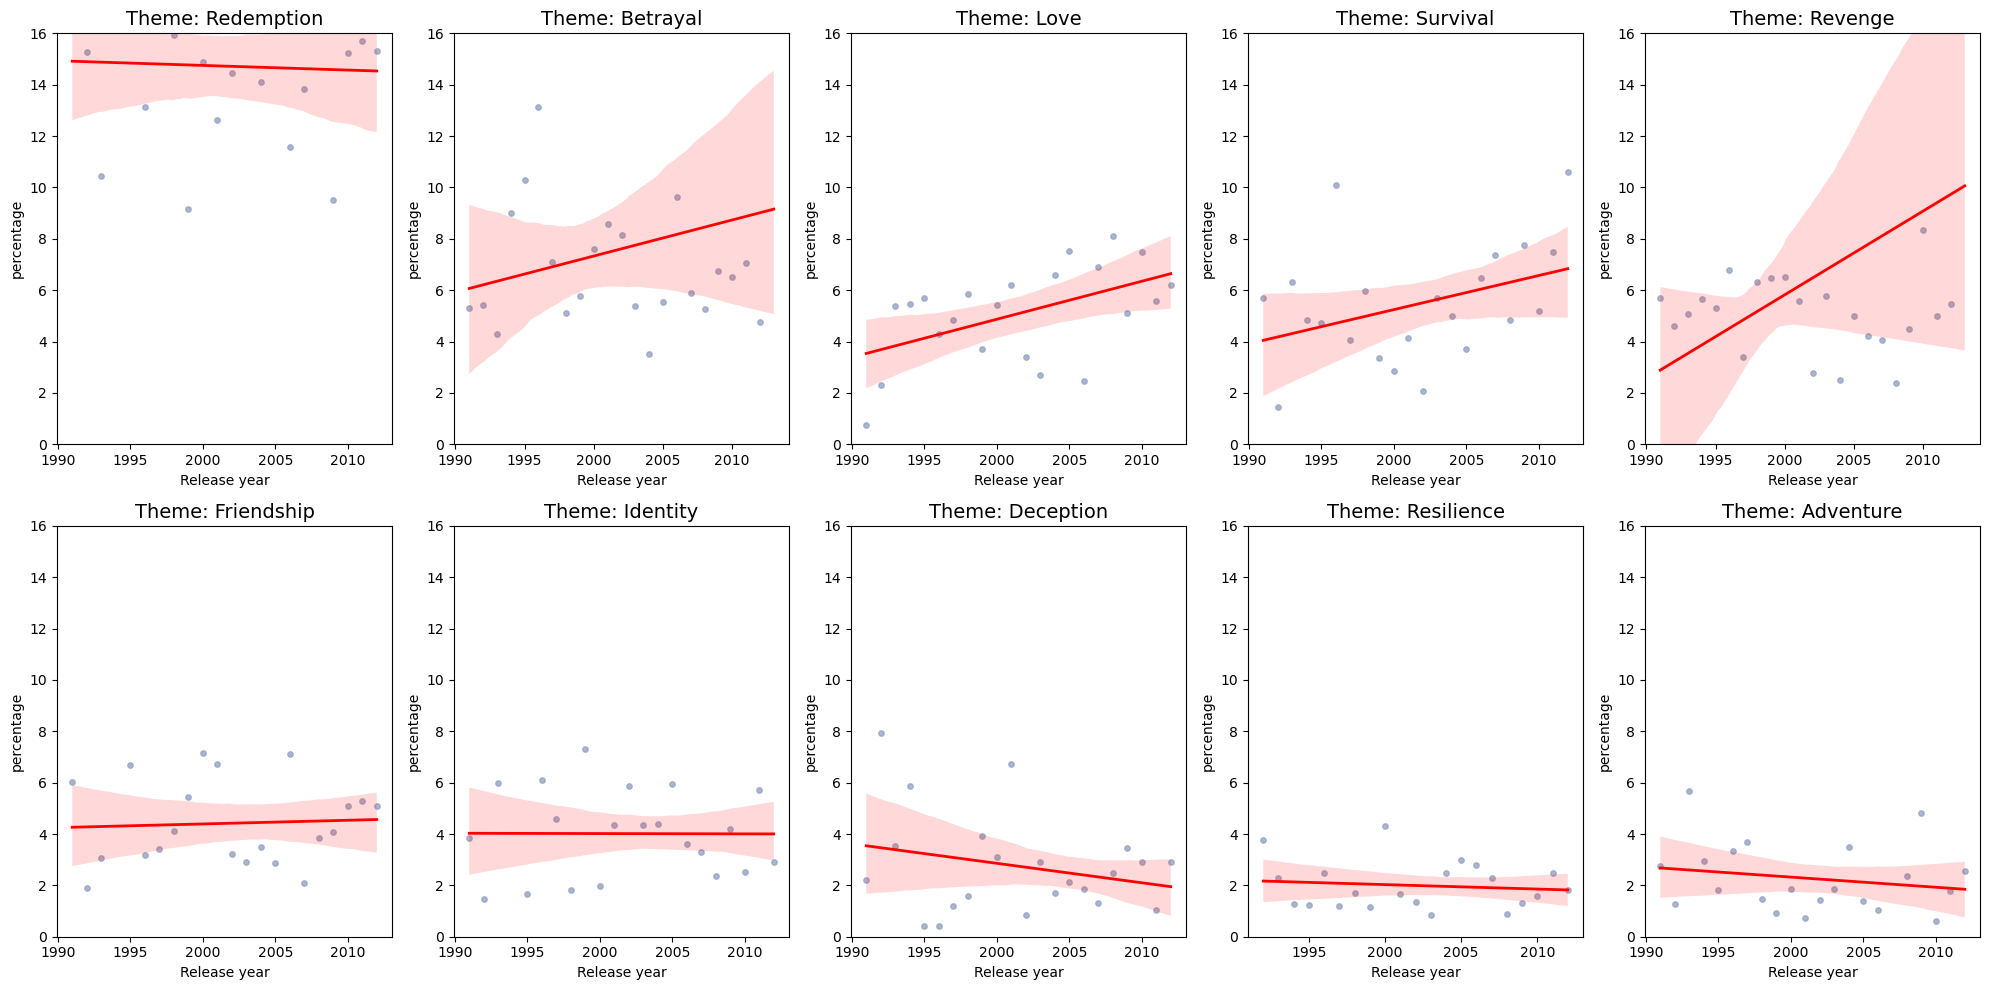

In [59]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['Movie release year', 'Theme', 'count']
df_genres['total'] = df_genres.groupby('Movie release year')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Theme'] = df_genres['Theme'].astype(str)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"Theme: {theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Release year')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

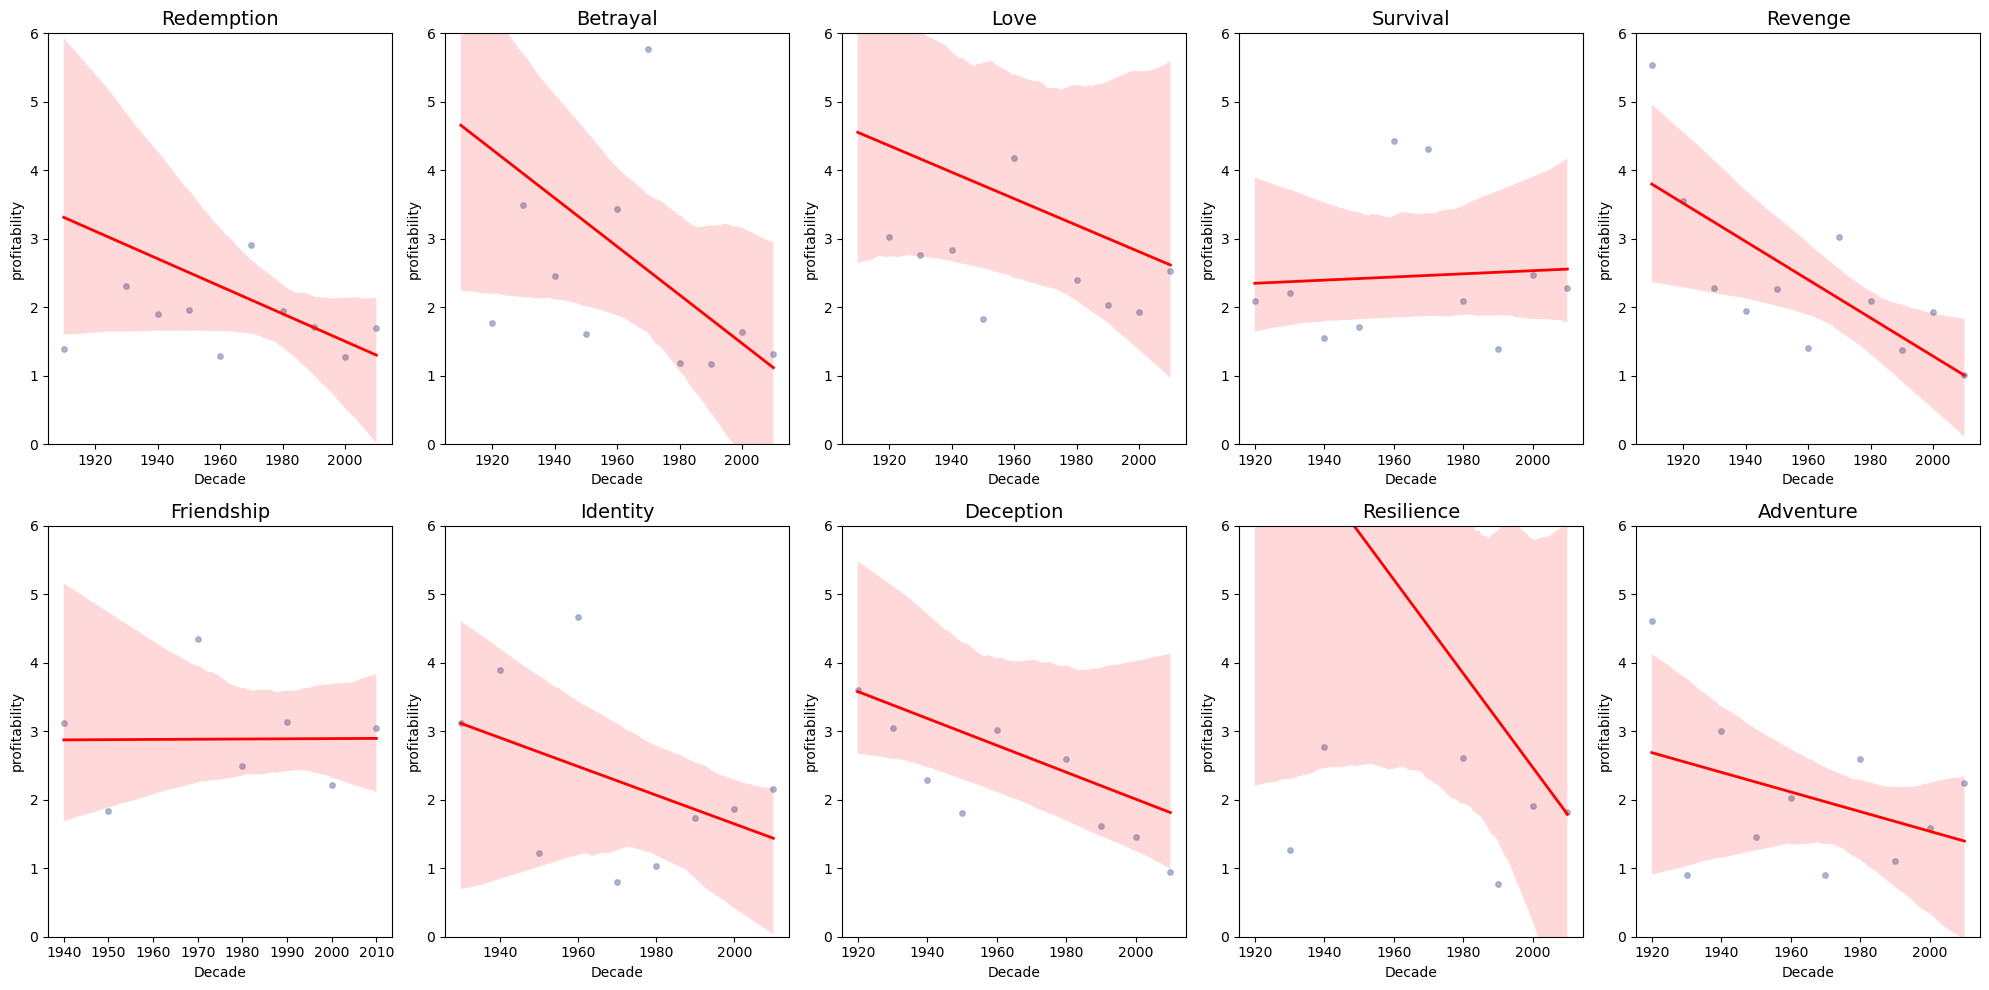

In [60]:
df_genres = df_exploded.groupby(['decade', 'Theme'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['decade'] > 1900]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='decade',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Decade')
    ax.set_ylabel('profitability')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


#not the same in time

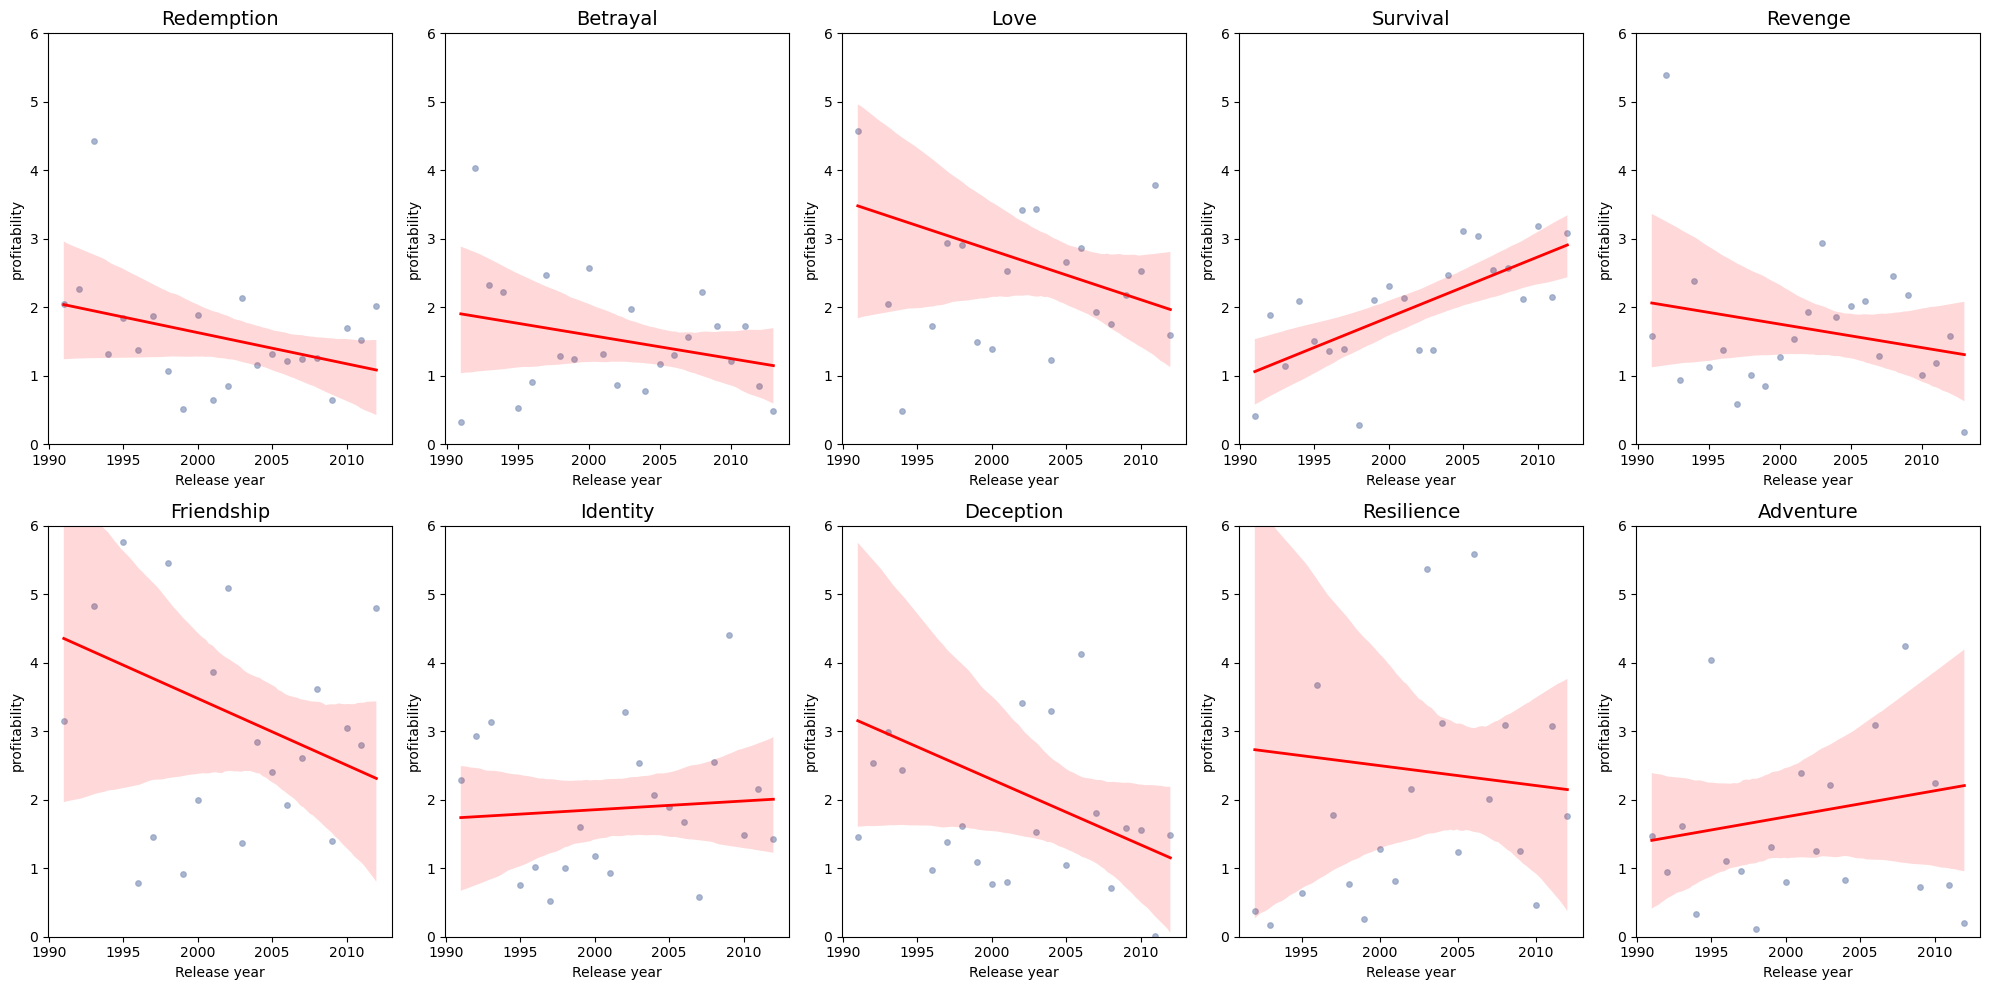

In [61]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('profitability')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [62]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['budget'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres

Movie release year       Theme        budget
0                1915.0    Betrayal  5.254238e+05
1                1915.0        Love  4.586190e+05
2                1916.0  Redemption  3.008128e+07
3                1916.0     Revenge  5.587599e+05
4                1921.0        Love  3.794609e+06
..                  ...         ...           ...
540              2012.0  Resilience  1.895100e+07
541              2012.0     Revenge  6.091394e+07
542              2012.0    Survival  8.798680e+07
543              2013.0    Betrayal  4.640304e+07
544              2013.0     Revenge  7.291907e+07

[545 rows x 3 columns]

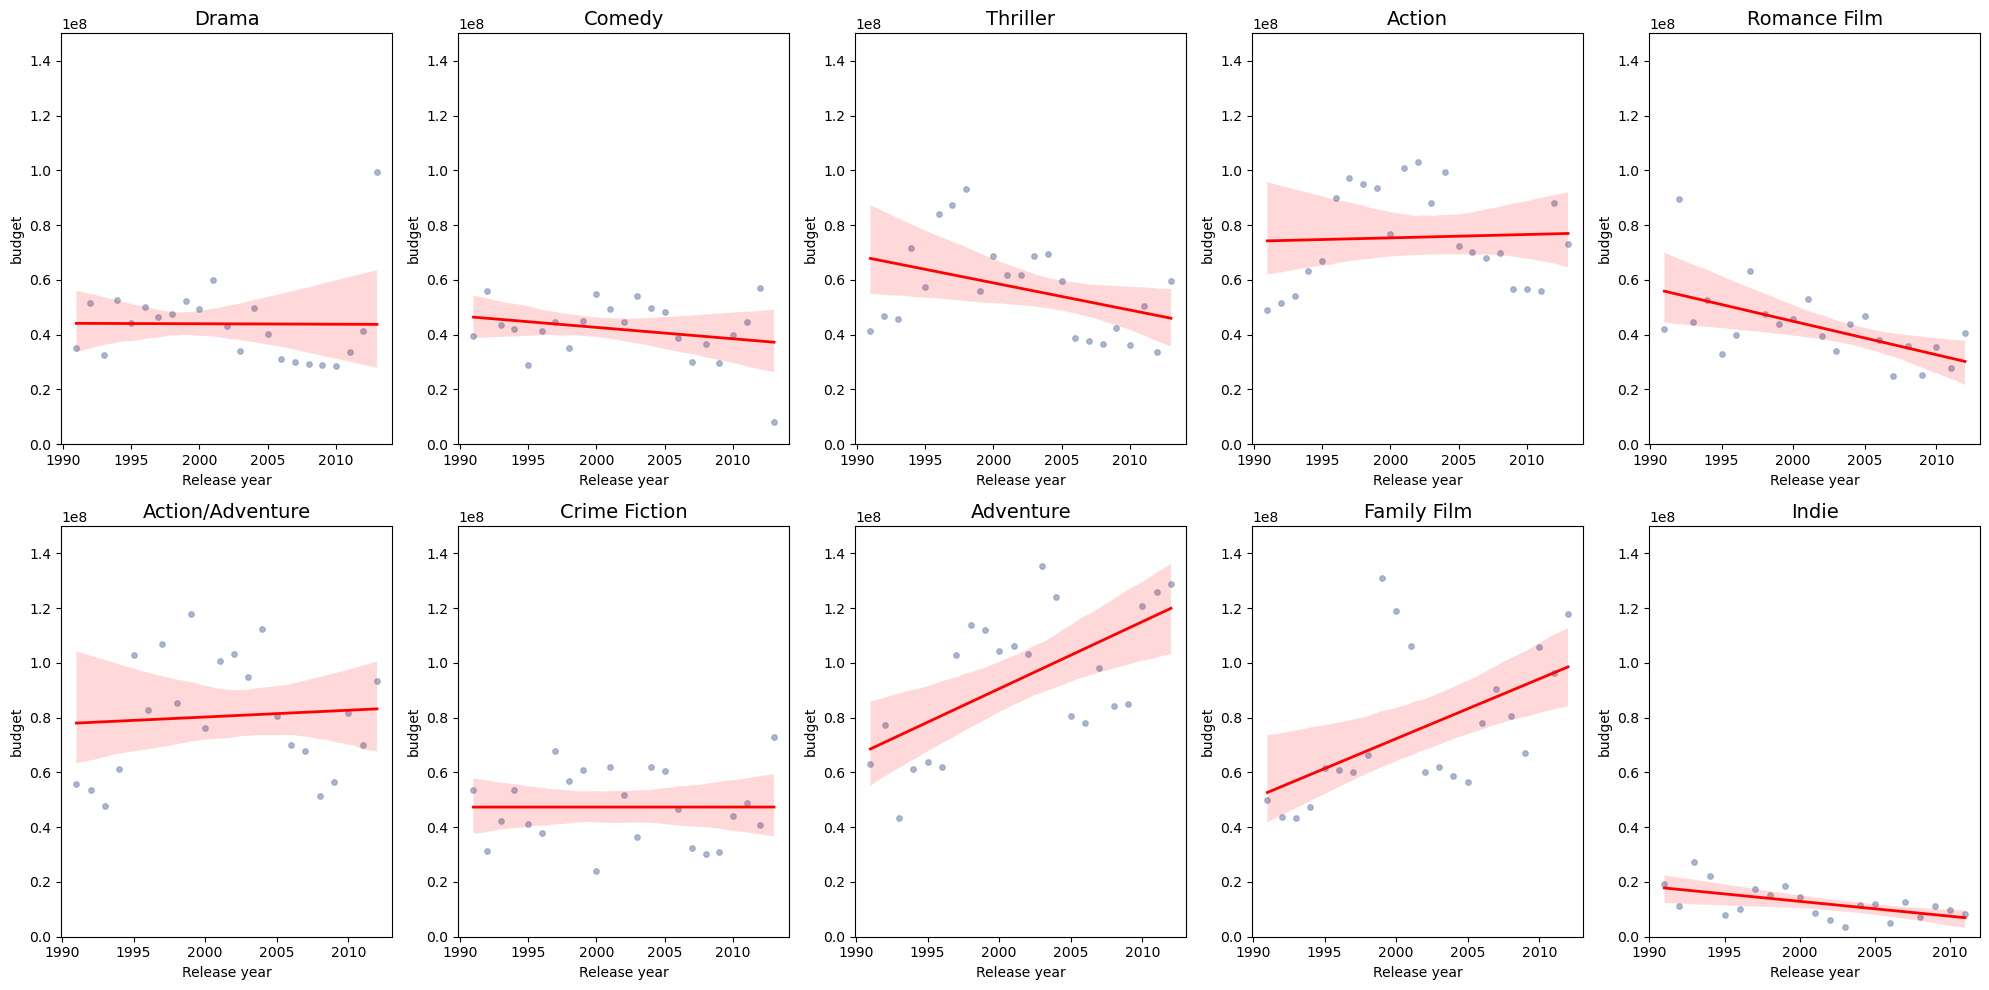

In [63]:
#do some genres have higher budget? 
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres'])['budget'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='budget', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 150000000)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('budget')
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

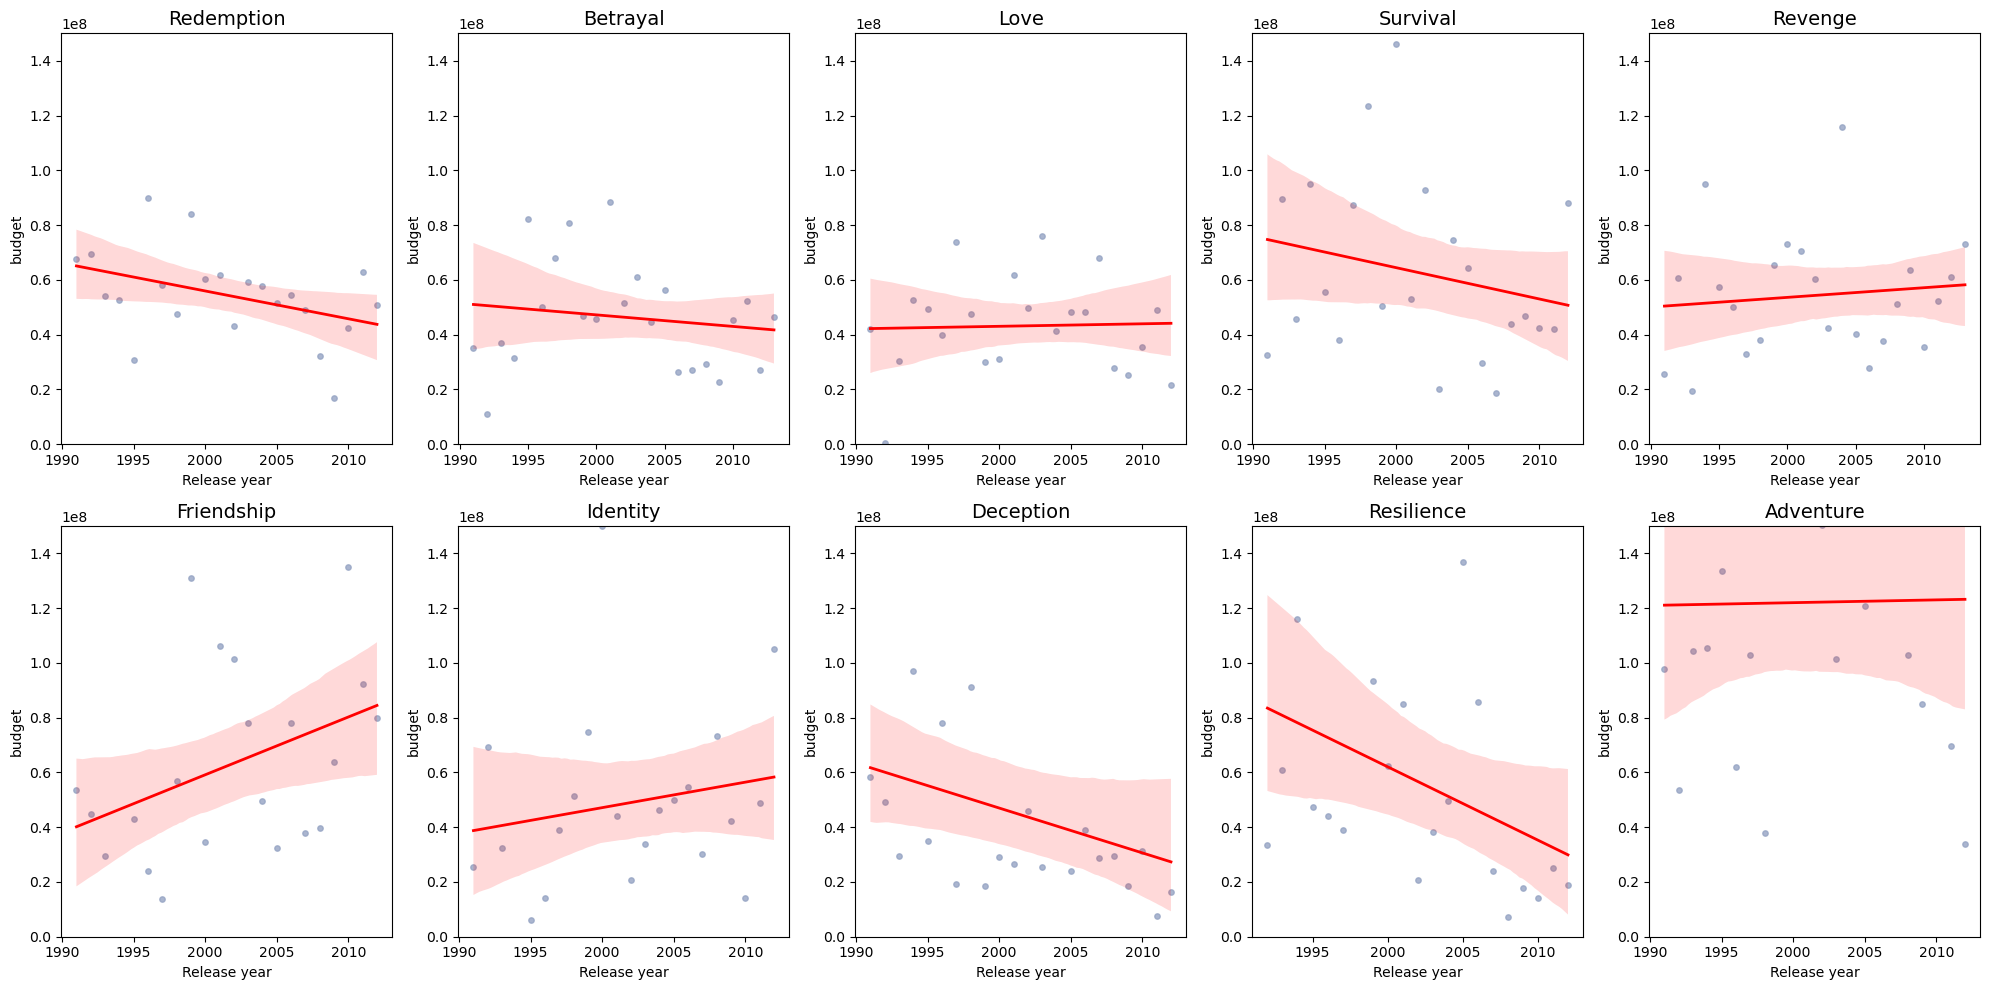

In [64]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['budget'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='budget', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 150000000)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('budget')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

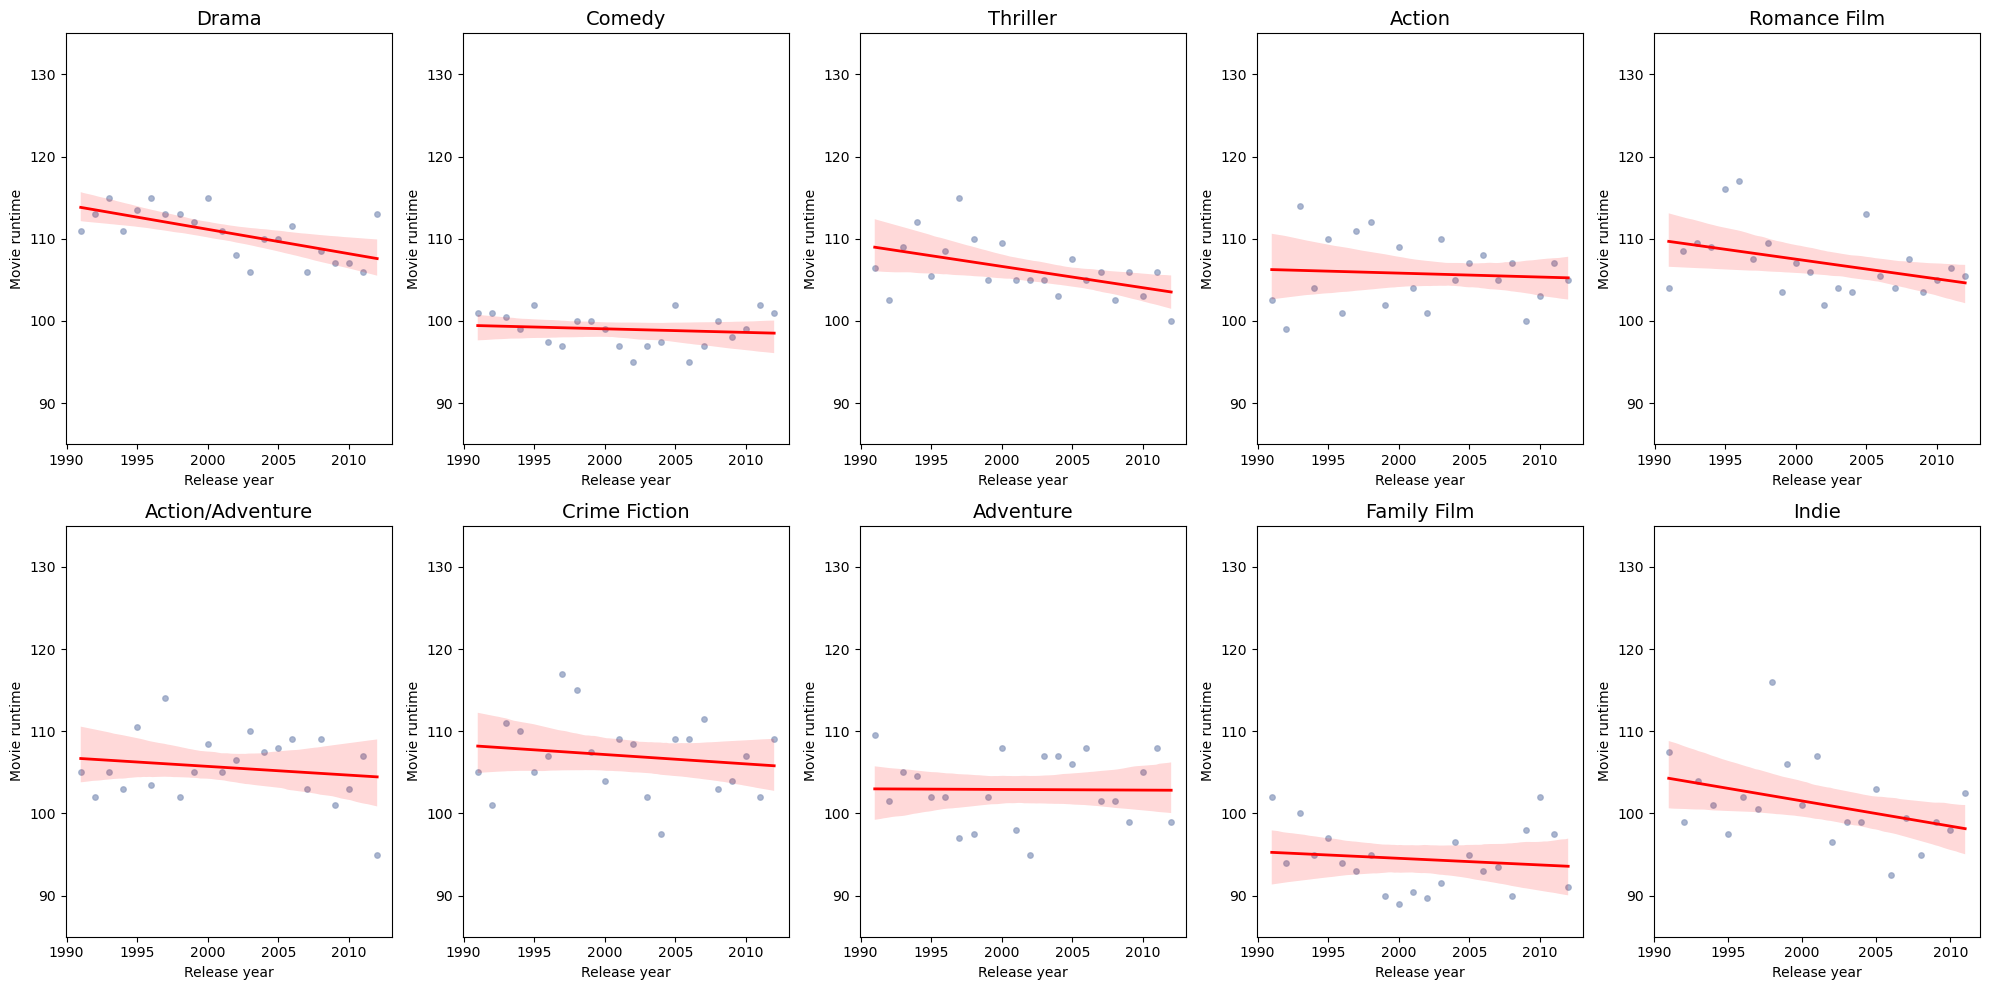

In [65]:
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres'])['Movie runtime'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]
df_genres = df_genres[df_genres['Movie release year'] < 2013]

#df_genres = df_genres[df_genres['Movie runtime'] < 800]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='Movie runtime', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(85, 135)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('Movie runtime')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

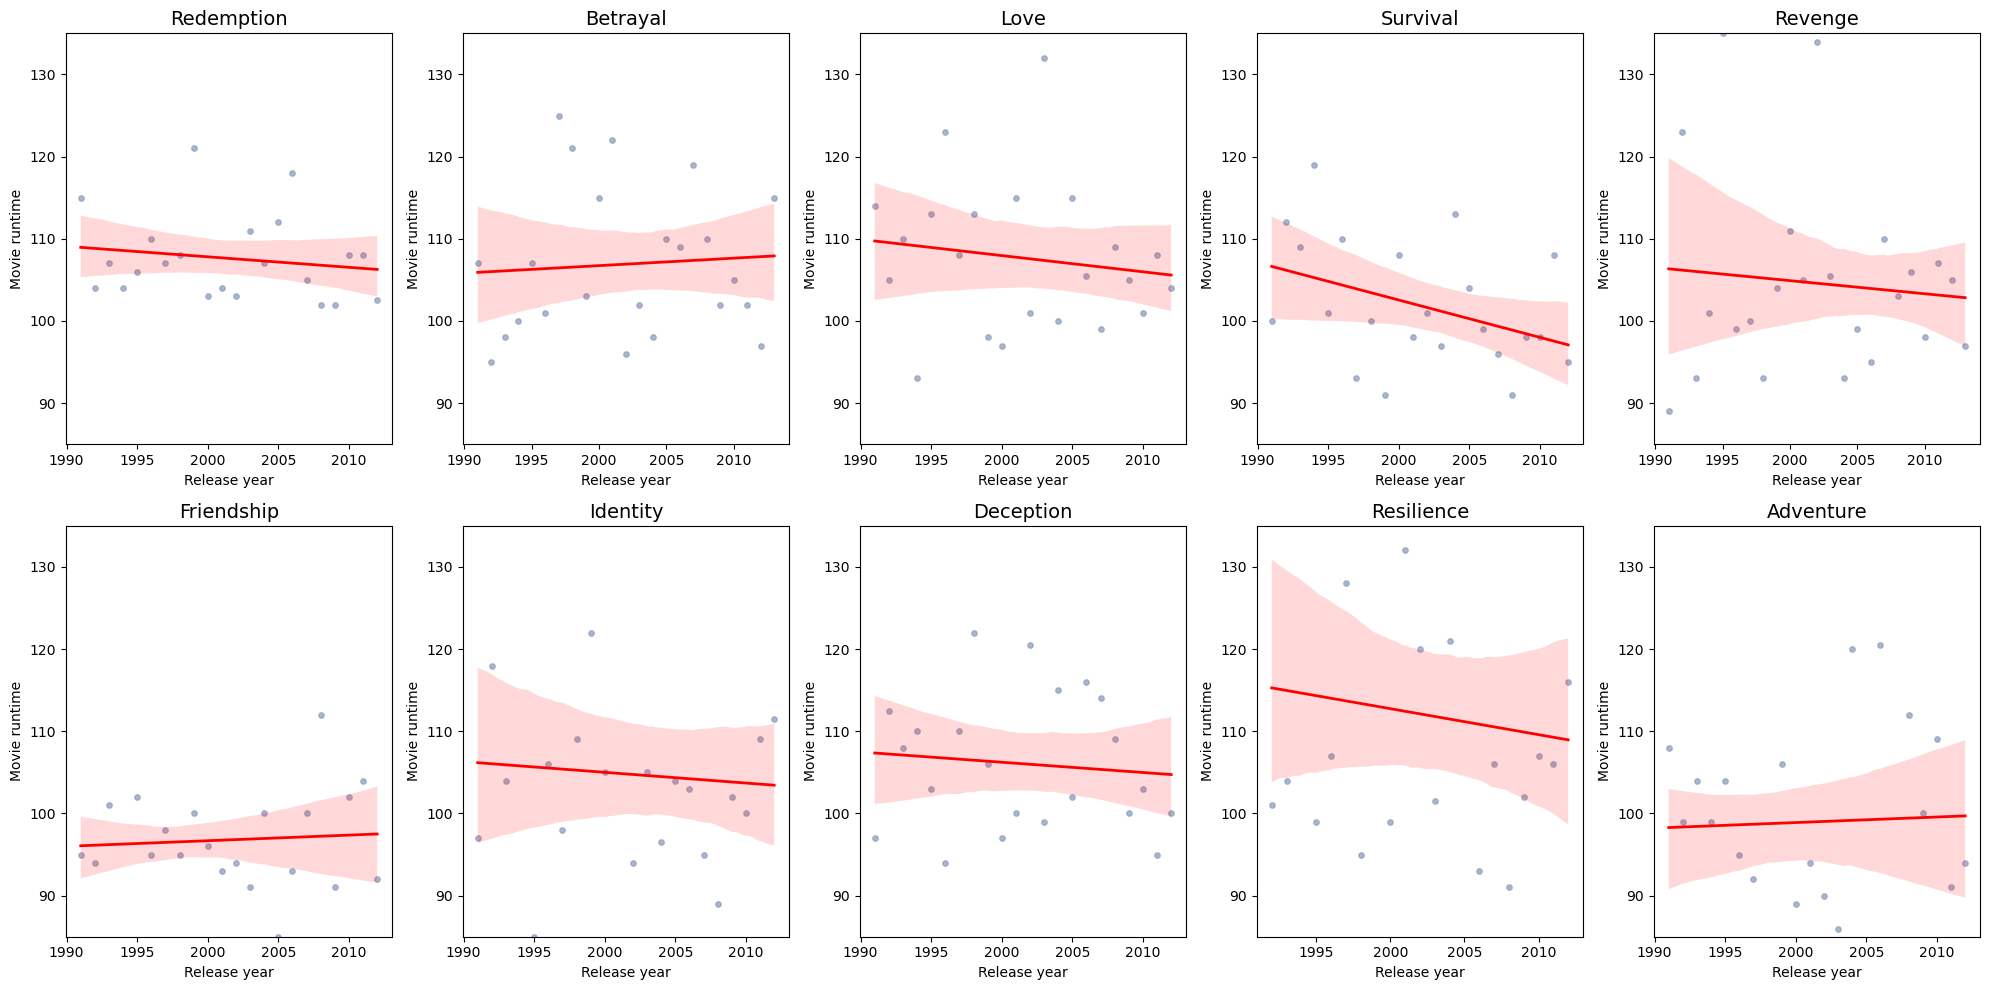

In [66]:
#do some genres have higher budget? 
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['Movie runtime'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='Movie runtime', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(85, 135)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('Movie runtime')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

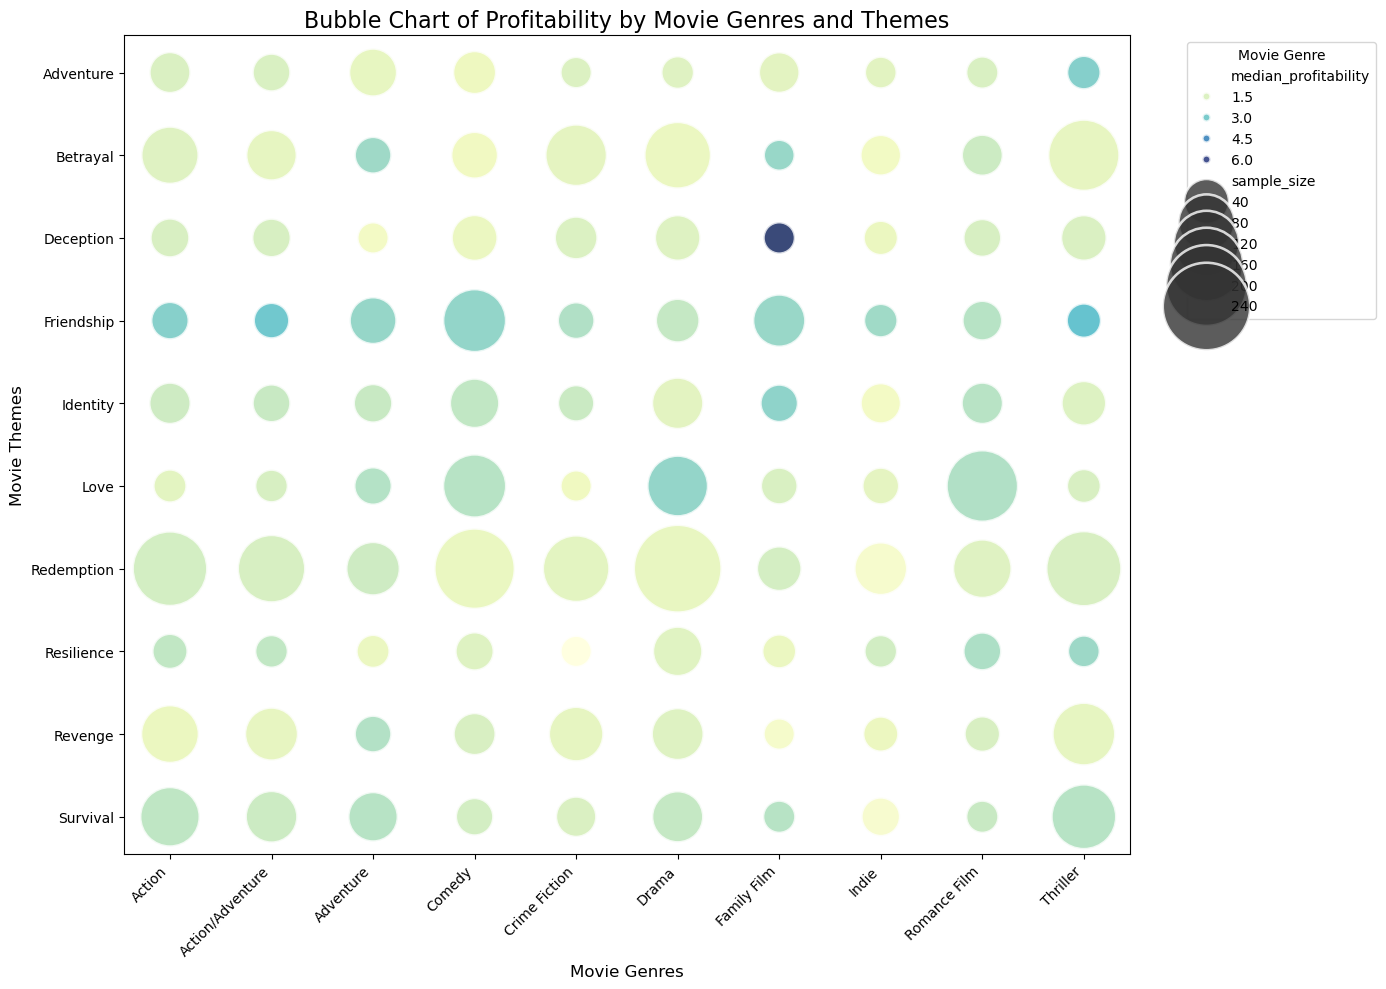

In [92]:
df_bubble = df_exploded.copy()  # Use your filtered dataset
df_bubble = df_bubble[df_bubble['budget'] > 0]  # Ensure budget is positive
df_bubble = df_bubble[df_bubble['profitability'] > 0]  # Ensure profitability is positive
df_bubble = df_bubble[df_bubble['decade'] > 1989]  # Filter by decade
df_bubble = df_bubble[df_bubble['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_bubble = df_bubble[df_bubble['Theme'].isin(top_10_themes.index)].reset_index(drop=True)

df_aggregated = df_bubble.groupby(['Movie genres', 'Theme']).agg(
    median_profitability=('profitability', 'median'),
    sample_size=('profitability', 'size')  # Count number of samples
).reset_index()

# Create the bubble chart
plt.figure(figsize=(14, 10))
bubble_chart = sns.scatterplot(
    data=df_aggregated,
    x="Movie genres",  # X-axis: Movie genres
    y="Theme",  # Y-axis: Movie themes
    size="sample_size",  # Bubble size: Number of samples
    hue="median_profitability",  # Bubble color: Profitability
    sizes=(500, 4000),  # Adjust bubble size range
    palette="YlGnBu",  # Color palette for profitability
    alpha=0.8  # Transparency for better visualization
)

# Add labels and title
bubble_chart.set_title("Bubble Chart of Profitability by Movie Genres and Themes", fontsize=16)
bubble_chart.set_xlabel("Movie Genres", fontsize=12)
bubble_chart.set_ylabel("Movie Themes", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Movie Genre")

#color_legend = bubble_chart.legend(
#    handles=handles[0:5],  # Color handles
#    labels=labels[0:5],  # Color labels
#    bbox_to_anchor=(1.05, 1), loc="upper left",
#)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Combine the results Bubble Charts

Bubble Chart of Profitability: 
X-axis: Budget Y-axis: Release month Bubble Size: Profitability Bubble Color: Movie genre 


WHich is most important??? Decision Trees & Feature Importance (Machine Learning)
Train a decision tree or regression model with features like budget, release month, genre, theme, runtime, and year to predict profitability. Visualize the resulting feature importance chart showing which factors influence profitability the most.

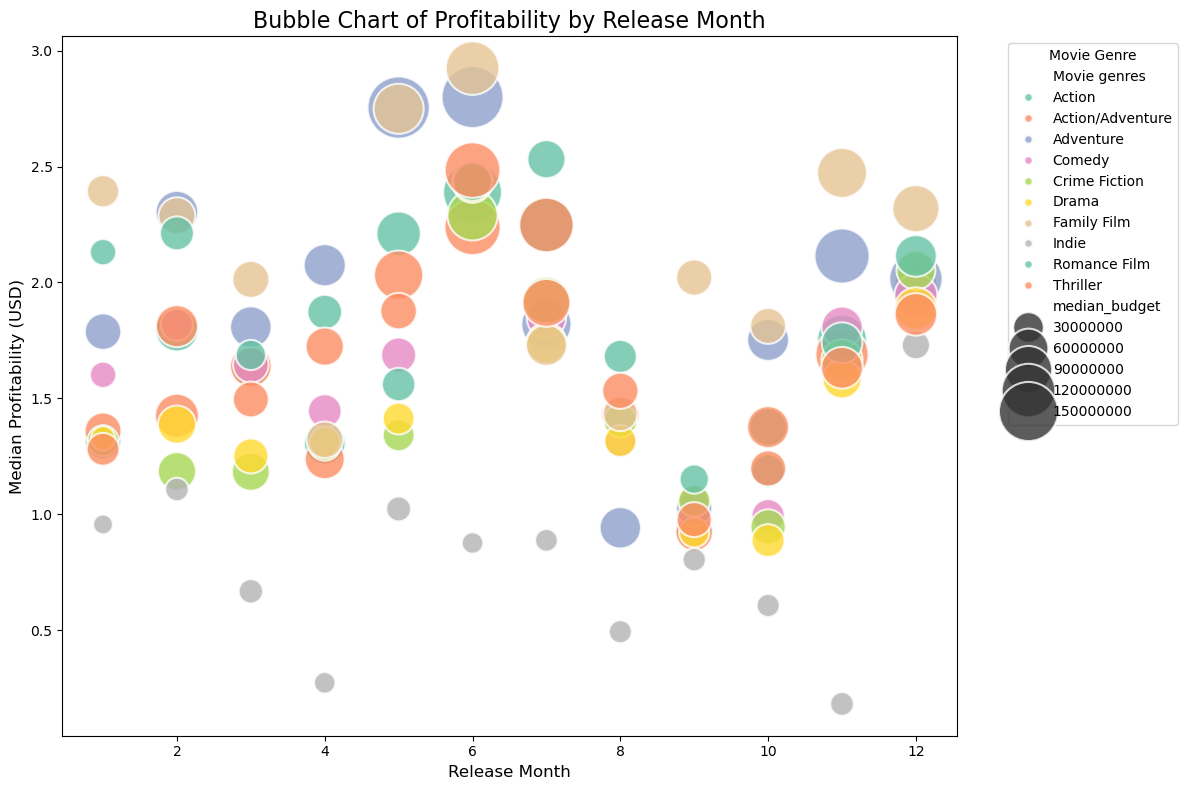

In [84]:
df_bubble = df_exploded.copy()  # Use your filtered dataset
df_bubble = df_bubble[df_bubble['budget'] > 0]  # Ensure budget is positive
df_bubble = df_bubble[df_bubble['profitability'] > 0]  # Ensure profitability is positive
df_bubble = df_bubble[df_bubble['decade'] > 1989]  # Filter by decade
df_bubble = df_bubble[df_bubble['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)


# Aggregate data by Movie genres and release month
df_aggregated = df_bubble.groupby(['Movie genres', 'Movie release month']).agg(
    median_profitability=('profitability', 'median'),
    median_budget=('budget', 'median')
).reset_index()

# Create bubble chart with release month on the y-axis
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(
    data=df_aggregated,
    y="median_profitability",  # X-axis: Median budget
    x="Movie release month",  # Y-axis: Release month
    size="median_budget",  # Bubble size: Median profitability
    sizes=(200, 2000),  # Adjust bubble size range
    hue="Movie genres",  # Bubble color: Movie genres
    palette="Set2",  # Color palette
    alpha=0.8  # Transparency for better overlap handling
)

# Add labels and title
bubble_chart.set_title("Bubble Chart of Profitability by Release Month", fontsize=16)
bubble_chart.set_xlabel("Release Month", fontsize=12)
bubble_chart.set_ylabel("Median Profitability (USD)", fontsize=12)

# Adjust legend and layout
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Movie Genre")
plt.tight_layout()
plt.show()

a. Choose Micro-Averaging When:
The focus is on overall model performance across all instances.
You want to minimize the global error (e.g., for predictions where every instance matters equally).
b. Choose Macro-Averaging When:
You're interested in ensuring fair performance across groups, especially in imbalanced datasets.
You want to highlight issues where the model performs poorly for certain groups (e.g., regions, demographics, or categories).

In [ ]:
df_ml = df_exploded.copy()
df_ml = df_ml[df_ml['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_ml = df_ml[df_ml['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_ml = df_ml[df_ml['Movie release year'] > 1988]
df_ml = df_ml[['Movie release month', 'Movie runtime', 'Movie genres', 'Theme', 'budget', 'profitability']]
# List of categorical features to one-hot encode
categorical_features = ['Movie release month', 'Movie genres', 'Theme']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_ml, columns=categorical_features, drop_first=True)

y = df_encoded['profitability'] 
X = df_encoded.drop(columns = ['profitability'])

In [ ]:
y_train.sort_values()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42,max_depth = 12)
regressor.fit(X_train, y_train)


In [ ]:
tree = regressor.tree_

# Locate the leaf node with the maximum profitability
leaf_values = tree.value[tree.children_left == -1]  # Only leaf nodes
max_profitability_index = np.argmax(leaf_values)  # Index of the leaf with max profitability
max_profitability_value = leaf_values[max_profitability_index]

# Trace back the decision path
def get_decision_path(tree, node_index, feature_names):
    path = []
    while node_index != 0:  # Root node has index 0
        parent_index = np.where(
            (tree.children_left == node_index) | (tree.children_right == node_index)
        )[0][0]
        if node_index == tree.children_left[parent_index]:
            threshold = f"<= {tree.threshold[parent_index]:.2f}"
        else:
            threshold = f"> {tree.threshold[parent_index]:.2f}"
        path.append(
            f"{feature_names[tree.feature[parent_index]]} {threshold}"
        )
        node_index = parent_index
    return path[::-1]  # Reverse to start from the root

# Extract feature names
feature_names = X_train.columns

# Get the decision path for the leaf node with max profitability
decision_path = get_decision_path(tree, max_profitability_index, feature_names)

# Print the results
print("Decision Path to Maximum Profitability:")
for step in decision_path:
    print(step)
print(f"Maximum Profitability: {max_profitability_value[0][0]:.2f}")

In [ ]:
import statsmodels.api as sm

# Check the DataFrame to confirm all columns are numeric
X = X.map(lambda x: int(x) if isinstance(x, bool) else x)

X = sm.add_constant(X)

# Step 3: Fit the OLS model
ols_model = sm.OLS(np.log(y), X).fit(cov_type='HC0')

# Step 4: Summarize the model
print(ols_model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display results
print(vif_data)